In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ All libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 2.2.3


In [4]:
# Load the dataset
df = pd.read_csv('../data/Sample - Superstore.csv', encoding='latin-1')

print("✅ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

FileNotFoundError: [Errno 2] No such file or directory: '../data/Sample - Superstore.csv'

In [5]:
import os
print(os.listdir('../data/'))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../data/'

In [6]:
import os
print("Current directory:", os.getcwd())

Current directory: D:\retail_project


In [7]:
import os
print(os.listdir('data/'))

['archive']


In [8]:
import os
print(os.listdir('data/archive/'))

['Sample - Superstore.csv', 'SampleSuperstore.csv']


In [9]:
# Load the dataset
df = pd.read_csv('data/archive/Sample - Superstore.csv', encoding='latin-1')

print("✅ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

✅ Dataset loaded successfully!
Dataset shape: (9994, 21)
Total rows: 9994
Total columns: 21


In [10]:
# Display first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
# Check column names and data types
print("Column Names and Data Types:")
print("="*50)
df.info()

Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non

In [12]:
# Check for missing values
print("Missing Values in Each Column:")
print("="*50)
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n" + "="*50)
print(f"Total missing values: {df.isnull().sum().sum()}")

Missing Values in Each Column:
Series([], dtype: int64)

Total missing values: 0


In [13]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")
else:
    print("✅ No duplicate rows found!")

Number of duplicate rows: 0
✅ No duplicate rows found!


In [14]:
# Statistical summary of numerical columns
print("Statistical Summary:")
print("="*50)
df.describe()

Statistical Summary:


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
# Check unique values in key categorical columns
print("Unique Values in Categorical Columns:")
print("="*50)

categorical_cols = ['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Region']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}: {df[col].nunique()} unique values")
        print(df[col].value_counts())
        print("-"*50)

Unique Values in Categorical Columns:

Ship Mode: 4 unique values
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64
--------------------------------------------------

Segment: 3 unique values
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64
--------------------------------------------------

Category: 3 unique values
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64
--------------------------------------------------

Sub-Category: 17 unique values
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, d

In [16]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

print("✅ Date columns converted!")
print("\nDate Range:")
print(f"Earliest order: {df['Order Date'].min()}")
print(f"Latest order: {df['Order Date'].max()}")
print(f"Total time period: {(df['Order Date'].max() - df['Order Date'].min()).days} days")

✅ Date columns converted!

Date Range:
Earliest order: 2014-01-03 00:00:00
Latest order: 2017-12-30 00:00:00
Total time period: 1457 days


In [17]:
# Overall business metrics
print("📊 OVERALL BUSINESS METRICS")
print("="*50)

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Profit Margin: {(total_profit/total_sales)*100:.2f}%")
print(f"Total Orders: {total_orders:,}")
print(f"Total Customers: {total_customers:,}")
print(f"Average Order Value: ${total_sales/total_orders:,.2f}")

📊 OVERALL BUSINESS METRICS
Total Sales: $2,297,200.86
Total Profit: $286,397.02
Profit Margin: 12.47%
Total Orders: 5,009
Total Customers: 793
Average Order Value: $458.61


In [18]:
# Sales and Profit by Category
print("📦 SALES & PROFIT BY CATEGORY")
print("="*50)

category_performance = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

category_performance.columns = ['Total Sales', 'Total Profit', 'Number of Orders']
category_performance['Profit Margin %'] = (category_performance['Total Profit'] / category_performance['Total Sales'] * 100).round(2)
category_performance = category_performance.sort_values('Total Sales', ascending=False)

print(category_performance)

📦 SALES & PROFIT BY CATEGORY
                 Total Sales  Total Profit  Number of Orders  Profit Margin %
Category                                                                     
Technology         836154.03     145454.95              1847            17.40
Furniture          741999.80      18451.27              2121             2.49
Office Supplies    719047.03     122490.80              6026            17.04


In [19]:
# Top 10 products by sales
print("🏆 TOP 10 PRODUCTS BY SALES")
print("="*50)

top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

for i, (product, sales) in enumerate(top_products.items(), 1):
    print(f"{i}. {product[:50]}... : ${sales:,.2f}")

🏆 TOP 10 PRODUCTS BY SALES
1. Canon imageCLASS 2200 Advanced Copier... : $61,599.82
2. Fellowes PB500 Electric Punch Plastic Comb Binding... : $27,453.38
3. Cisco TelePresence System EX90 Videoconferencing U... : $22,638.48
4. HON 5400 Series Task Chairs for Big and Tall... : $21,870.58
5. GBC DocuBind TL300 Electric Binding System... : $19,823.48
6. GBC Ibimaster 500 Manual ProClick Binding System... : $19,024.50
7. Hewlett Packard LaserJet 3310 Copier... : $18,839.69
8. HP Designjet T520 Inkjet Large Format Printer - 24... : $18,374.90
9. GBC DocuBind P400 Electric Binding System... : $17,965.07
10. High Speed Automatic Electric Letter Opener... : $17,030.31


In [20]:
# Create year and month columns for analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Sales by Year
print("📅 SALES BY YEAR")
print("="*50)
yearly_sales = df.groupby('Year').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

yearly_sales.columns = ['Total Sales', 'Total Profit', 'Number of Orders']
print(yearly_sales)

print("\n📈 Year-over-Year Growth:")
for i in range(1, len(yearly_sales)):
    growth = ((yearly_sales.iloc[i]['Total Sales'] - yearly_sales.iloc[i-1]['Total Sales']) / yearly_sales.iloc[i-1]['Total Sales'] * 100)
    print(f"{yearly_sales.index[i-1]} to {yearly_sales.index[i]}: {growth:.2f}%")

📅 SALES BY YEAR
      Total Sales  Total Profit  Number of Orders
Year                                             
2014    484247.50      49543.97              1993
2015    470532.51      61618.60              2102
2016    609205.60      81795.17              2587
2017    733215.26      93439.27              3312

📈 Year-over-Year Growth:
2014 to 2015: -2.83%
2015 to 2016: 29.47%
2016 to 2017: 20.36%


In [21]:
# Sales by Month (across all years)
print("📆 SALES BY MONTH (Seasonality)")
print("="*50)

monthly_sales = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)

month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
               7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

for month, sales in monthly_sales.items():
    print(f"{month_names[month]}: ${sales:,.2f}")

📆 SALES BY MONTH (Seasonality)
Nov: $352,461.07
Dec: $325,293.50
Sep: $307,649.95
Mar: $205,005.49
Oct: $200,322.98
Aug: $159,044.06
May: $155,028.81
Jun: $152,718.68
Jul: $147,238.10
Apr: $137,762.13
Jan: $94,924.84
Feb: $59,751.25


In [22]:
# Sales and Profit by Region
print("🌍 SALES & PROFIT BY REGION")
print("="*50)

region_performance = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Customer ID': 'nunique'
}).round(2)

region_performance.columns = ['Total Sales', 'Total Profit', 'Orders', 'Customers']
region_performance['Profit Margin %'] = (region_performance['Total Profit'] / region_performance['Total Sales'] * 100).round(2)
region_performance['Avg Order Value'] = (region_performance['Total Sales'] / region_performance['Orders']).round(2)
region_performance = region_performance.sort_values('Total Sales', ascending=False)

print(region_performance)


🌍 SALES & PROFIT BY REGION
         Total Sales  Total Profit  Orders  Customers  Profit Margin %  \
Region                                                                   
West       725457.82     108418.45    3203        686            14.94   
East       678781.24      91522.78    2848        674            13.48   
Central    501239.89      39706.36    2323        629             7.92   
South      391721.90      46749.43    1620        512            11.93   

         Avg Order Value  
Region                    
West              226.49  
East              238.34  
Central           215.77  
South             241.80  


In [23]:
# Sales by Customer Segment
print("👥 SALES BY CUSTOMER SEGMENT")
print("="*50)

segment_performance = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Customer ID': 'nunique'
}).round(2)

segment_performance.columns = ['Total Sales', 'Total Profit', 'Orders', 'Customers']
segment_performance['Profit Margin %'] = (segment_performance['Total Profit'] / segment_performance['Total Sales'] * 100).round(2)
segment_performance['Avg Sales per Customer'] = (segment_performance['Total Sales'] / segment_performance['Customers']).round(2)
segment_performance = segment_performance.sort_values('Total Sales', ascending=False)

print(segment_performance)

👥 SALES BY CUSTOMER SEGMENT
             Total Sales  Total Profit  Orders  Customers  Profit Margin %  \
Segment                                                                      
Consumer      1161401.34     134119.21    5191        409            11.55   
Corporate      706146.37      91979.13    3020        236            13.03   
Home Office    429653.15      60298.68    1783        148            14.03   

             Avg Sales per Customer  
Segment                              
Consumer                    2839.61  
Corporate                   2992.15  
Home Office                 2903.06  


In [24]:
# Discount Analysis
print("💰 DISCOUNT IMPACT ANALYSIS")
print("="*50)

# Create discount brackets
df['Discount_Bracket'] = pd.cut(df['Discount'], 
                                  bins=[0, 0.1, 0.2, 0.3, 1.0],
                                  labels=['0-10%', '10-20%', '20-30%', '30%+'])

discount_impact = df.groupby('Discount_Bracket').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

discount_impact.columns = ['Total Sales', 'Total Profit', 'Number of Orders']
discount_impact['Profit Margin %'] = (discount_impact['Total Profit'] / discount_impact['Total Sales'] * 100).round(2)
discount_impact['Avg Profit per Order'] = (discount_impact['Total Profit'] / discount_impact['Number of Orders']).round(2)

print(discount_impact)

print(f"\n⚠️ Orders with NO discount: {len(df[df['Discount'] == 0]):,} ({len(df[df['Discount'] == 0])/len(df)*100:.1f}%)")
print(f"📊 Orders WITH discount: {len(df[df['Discount'] > 0]):,} ({len(df[df['Discount'] > 0])/len(df)*100:.1f}%)")

💰 DISCOUNT IMPACT ANALYSIS
                  Total Sales  Total Profit  Number of Orders  \
Discount_Bracket                                                
0-10%                54369.35       9029.18                94   
10-20%              792152.89      91756.30              3709   
20-30%              103226.66     -10369.28               227   
30%+                259543.49    -125006.78              1166   

                  Profit Margin %  Avg Profit per Order  
Discount_Bracket                                         
0-10%                       16.61                 96.06  
10-20%                      11.58                 24.74  
20-30%                     -10.05                -45.68  
30%+                       -48.16               -107.21  

⚠️ Orders with NO discount: 4,798 (48.0%)
📊 Orders WITH discount: 5,196 (52.0%)


C:\Users\devik\AppData\Local\Temp\ipykernel_25196\3515493480.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_impact = df.groupby('Discount_Bracket').agg({


In [25]:
# Customer Lifetime Value Analysis
print("💎 CUSTOMER LIFETIME VALUE (CLV) ANALYSIS")
print("="*50)

customer_clv = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

customer_clv.columns = ['Total_Sales', 'Total_Profit', 'Number_of_Orders']
customer_clv['Avg_Order_Value'] = (customer_clv['Total_Sales'] / customer_clv['Number_of_Orders']).round(2)

# Add customer name
customer_names = df.groupby('Customer ID')['Customer Name'].first()
customer_clv['Customer_Name'] = customer_names

print("\n🏆 TOP 10 CUSTOMERS BY TOTAL SALES:")
top_customers = customer_clv.nlargest(10, 'Total_Sales')[['Customer_Name', 'Total_Sales', 'Total_Profit', 'Number_of_Orders']]
for i, (cust_id, row) in enumerate(top_customers.iterrows(), 1):
    print(f"{i}. {row['Customer_Name']}: ${row['Total_Sales']:,.2f} | Orders: {int(row['Number_of_Orders'])} | Profit: ${row['Total_Profit']:,.2f}")

print(f"\n📊 Average CLV: ${customer_clv['Total_Sales'].mean():,.2f}")
print(f"📊 Median CLV: ${customer_clv['Total_Sales'].median():,.2f}")

💎 CUSTOMER LIFETIME VALUE (CLV) ANALYSIS

🏆 TOP 10 CUSTOMERS BY TOTAL SALES:
1. Sean Miller: $25,043.05 | Orders: 15 | Profit: $-1,980.74
2. Tamara Chand: $19,052.22 | Orders: 12 | Profit: $8,981.32
3. Raymond Buch: $15,117.34 | Orders: 18 | Profit: $6,976.10
4. Tom Ashbrook: $14,595.62 | Orders: 10 | Profit: $4,703.79
5. Adrian Barton: $14,473.57 | Orders: 20 | Profit: $5,444.81
6. Ken Lonsdale: $14,175.23 | Orders: 29 | Profit: $806.86
7. Sanjit Chand: $14,142.33 | Orders: 22 | Profit: $5,757.41
8. Hunter Lopez: $12,873.30 | Orders: 11 | Profit: $5,622.43
9. Sanjit Engle: $12,209.44 | Orders: 19 | Profit: $2,650.68
10. Christopher Conant: $12,129.07 | Orders: 11 | Profit: $2,177.05

📊 Average CLV: $2,896.85
📊 Median CLV: $2,256.39


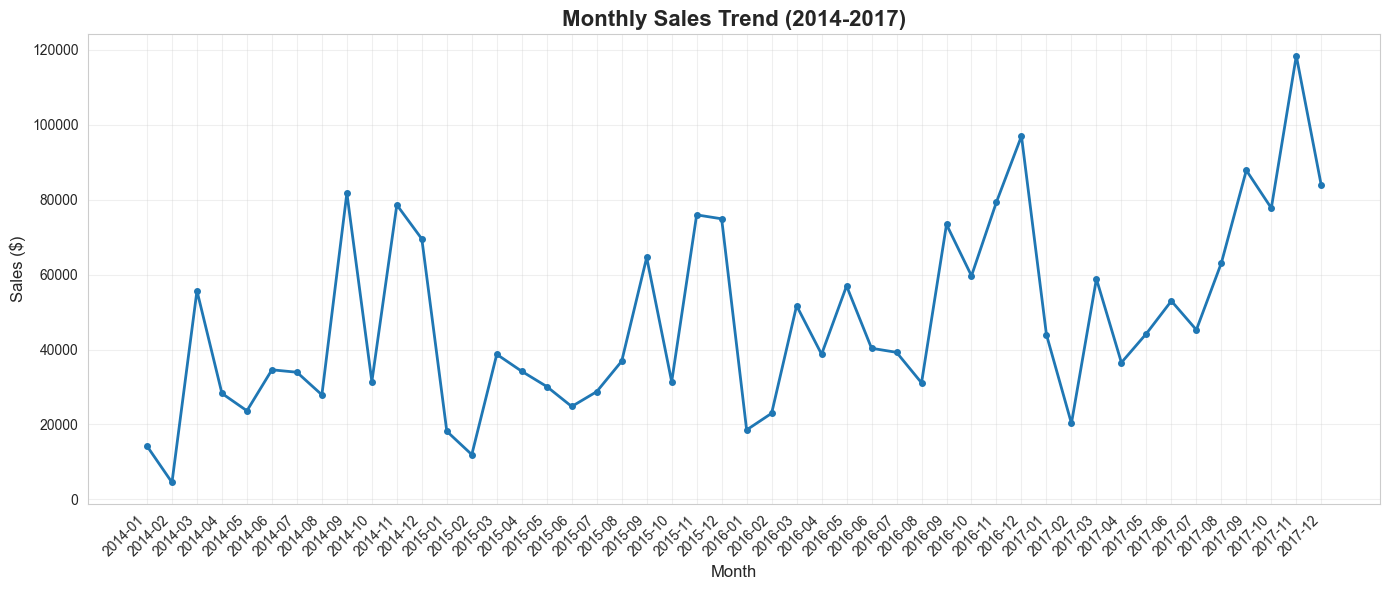

✅ Sales trend chart created!


In [26]:
# Visualization 1: Monthly Sales Trend
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Monthly sales over time
monthly_trend = df.groupby('Year-Month')['Sales'].sum().reset_index()
monthly_trend['Year-Month'] = monthly_trend['Year-Month'].astype(str)

plt.plot(monthly_trend['Year-Month'], monthly_trend['Sales'], marker='o', linewidth=2, markersize=4)
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Sales Trend (2014-2017)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Sales trend chart created!")

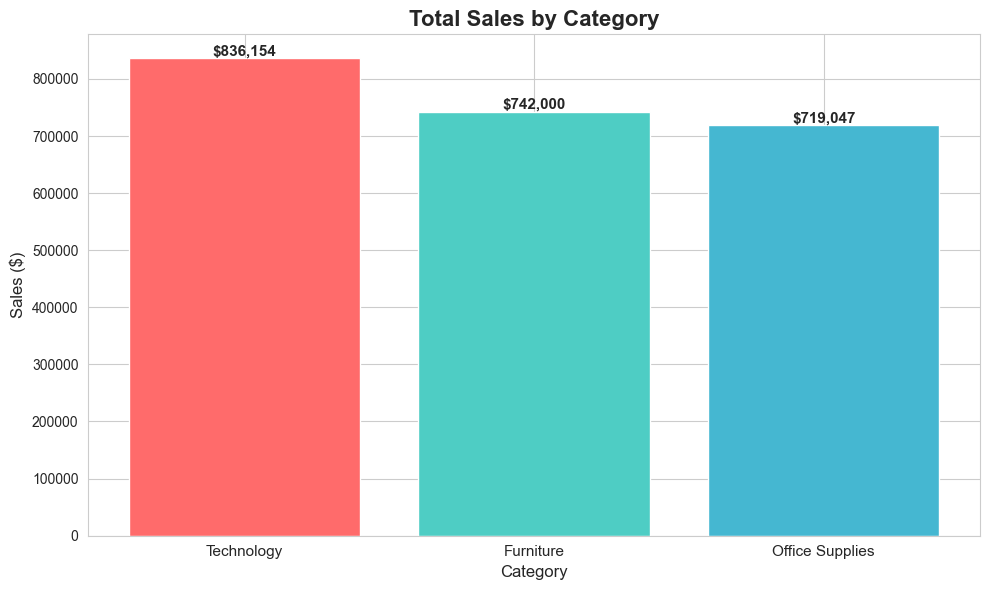

✅ Category sales chart created!


In [27]:
# Visualization 2: Sales by Category
plt.figure(figsize=(10, 6))

category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

bars = plt.bar(category_sales.index, category_sales.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Total Sales by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.xticks(fontsize=11)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Category sales chart created!")

<Figure size 1000x600 with 0 Axes>

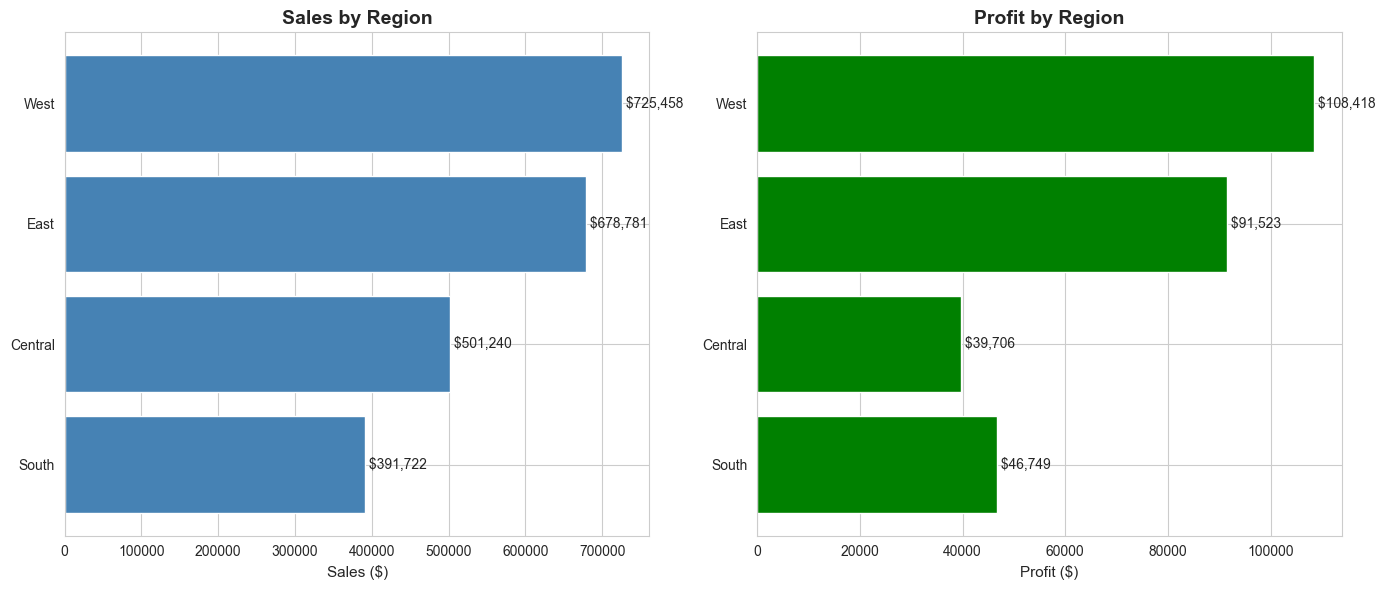

✅ Regional analysis charts created!


In [28]:
# Visualization 3: Sales by Region
plt.figure(figsize=(10, 6))

region_sales = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values('Sales', ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Sales by Region
ax1.barh(region_sales.index, region_sales['Sales'], color='steelblue')
ax1.set_title('Sales by Region', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sales ($)', fontsize=11)
for i, v in enumerate(region_sales['Sales']):
    ax1.text(v, i, f' ${v:,.0f}', va='center', fontsize=10)

# Profit by Region
ax2.barh(region_sales.index, region_sales['Profit'], color='green')
ax2.set_title('Profit by Region', fontsize=14, fontweight='bold')
ax2.set_xlabel('Profit ($)', fontsize=11)
for i, v in enumerate(region_sales['Profit']):
    ax2.text(v, i, f' ${v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("✅ Regional analysis charts created!")

C:\Users\devik\AppData\Local\Temp\ipykernel_25196\1330032694.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_data = df.groupby('Discount_Bracket').agg({


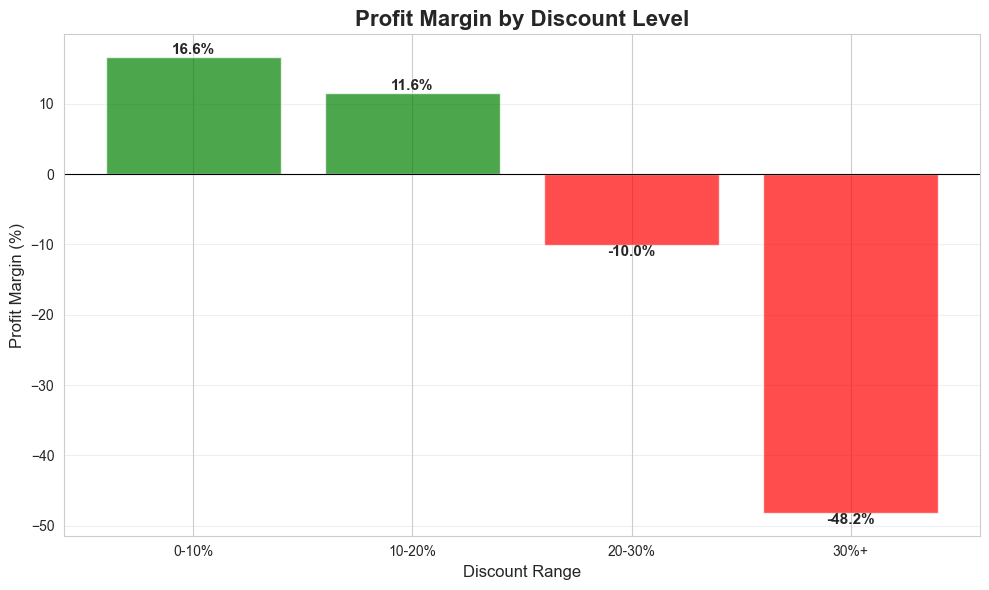

✅ Discount impact chart created!


In [29]:
# Visualization 4: Discount Impact on Profit Margin
plt.figure(figsize=(10, 6))

discount_data = df.groupby('Discount_Bracket').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})

discount_data['Profit_Margin'] = (discount_data['Profit'] / discount_data['Sales'] * 100)

colors = ['green' if x > 0 else 'red' for x in discount_data['Profit_Margin']]
bars = plt.bar(discount_data.index, discount_data['Profit_Margin'], color=colors, alpha=0.7)

plt.title('Profit Margin by Discount Level', fontsize=16, fontweight='bold')
plt.xlabel('Discount Range', fontsize=12)
plt.ylabel('Profit Margin (%)', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom' if height > 0 else 'top', 
             fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Discount impact chart created!")

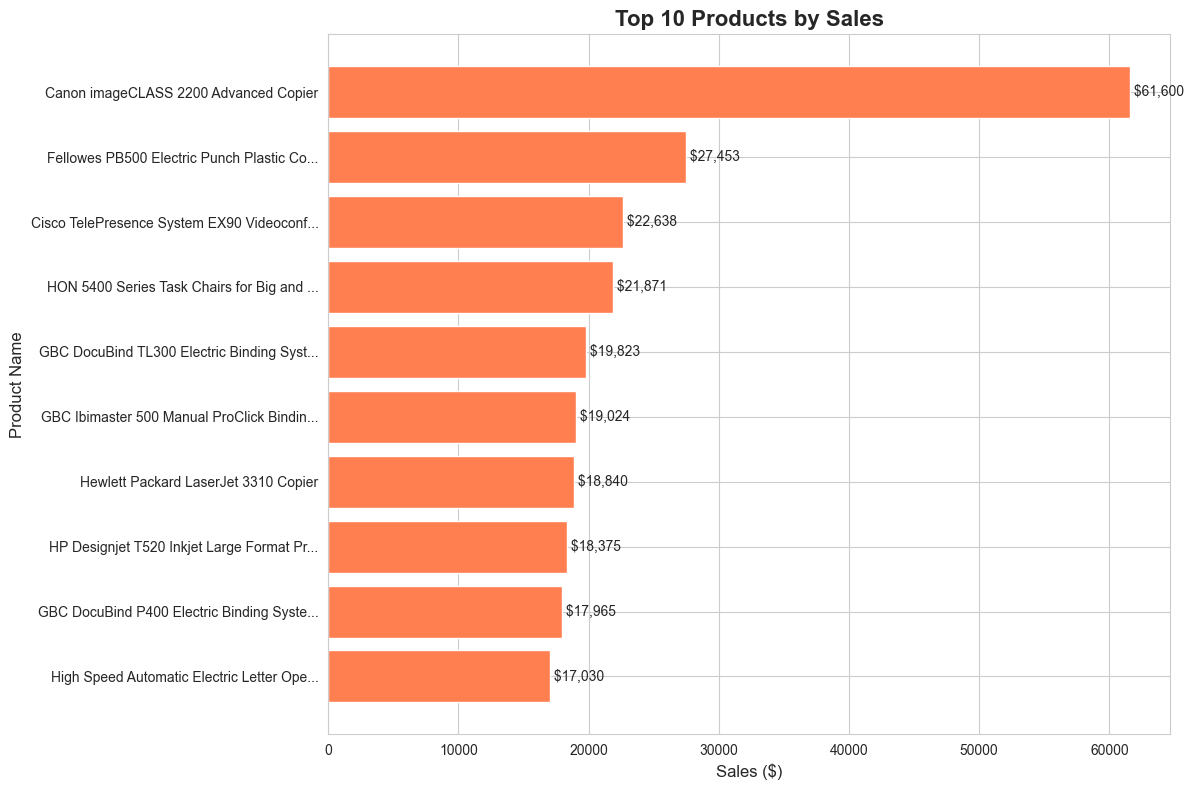

✅ Top products chart created!


In [30]:
# Visualization 5: Top 10 Products by Sales
plt.figure(figsize=(12, 8))

top_10_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).sort_values()

# Shorten product names for better display
product_labels = [name[:40] + '...' if len(name) > 40 else name for name in top_10_products.index]

plt.barh(product_labels, top_10_products.values, color='coral')
plt.title('Top 10 Products by Sales', fontsize=16, fontweight='bold')
plt.xlabel('Sales ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Add value labels
for i, v in enumerate(top_10_products.values):
    plt.text(v, i, f' ${v:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("✅ Top products chart created!")

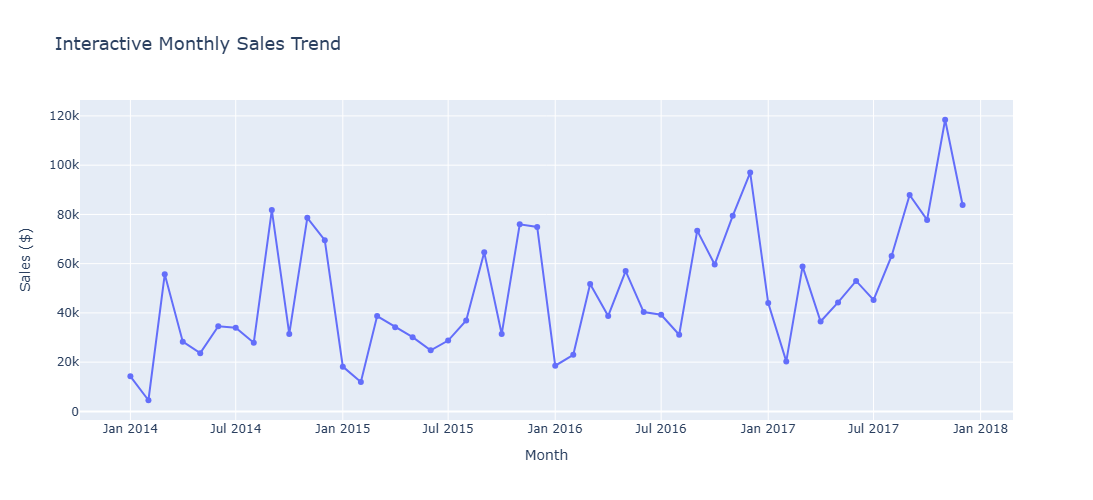

✅ Interactive Plotly chart created!


In [31]:
# Interactive Visualization with Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare data
monthly_data = df.groupby('Year-Month').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()
monthly_data['Year-Month'] = monthly_data['Year-Month'].astype(str)

# Create interactive line chart
fig = px.line(monthly_data, x='Year-Month', y='Sales', 
              title='Interactive Monthly Sales Trend',
              labels={'Sales': 'Sales ($)', 'Year-Month': 'Month'},
              markers=True)

fig.update_layout(
    hovermode='x unified',
    height=500,
    title_font_size=18
)

fig.show()

print("✅ Interactive Plotly chart created!")

In [32]:
# Step 1: Calculate RFM Metrics for each customer
print("📊 PREPARING RFM ANALYSIS")
print("="*50)

# Set reference date (day after last order)
reference_date = df['Order Date'].max() + pd.Timedelta(days=1)
print(f"Reference Date: {reference_date}")

# Calculate RFM metrics
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Order ID': 'count',  # Frequency
    'Sales': 'sum'  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']

# Add customer names
rfm = rfm.merge(df[['Customer ID', 'Customer Name']].drop_duplicates(), 
                left_on='Customer_ID', right_on='Customer ID', how='left')

print(f"\n✅ RFM data prepared for {len(rfm)} customers")
print("\nFirst 5 customers:")
print(rfm.head())

📊 PREPARING RFM ANALYSIS
Reference Date: 2017-12-31 00:00:00

✅ RFM data prepared for 793 customers

First 5 customers:
  Customer_ID  Recency  Frequency  Monetary Customer ID  Customer Name
0    AA-10315      185         11  5563.560    AA-10315     Alex Avila
1    AA-10375       20         15  1056.390    AA-10375   Allen Armold
2    AA-10480      260         12  1790.512    AA-10480   Andrew Allen
3    AA-10645       56         18  5086.935    AA-10645  Anna Andreadi
4    AB-10015      416          6   886.156    AB-10015  Aaron Bergman


In [33]:
# RFM Statistics
print("📈 RFM STATISTICS")
print("="*50)

print("\nRecency (Days since last purchase):")
print(rfm['Recency'].describe())

print("\n" + "="*50)
print("Frequency (Number of purchases):")
print(rfm['Frequency'].describe())

print("\n" + "="*50)
print("Monetary (Total spending):")
print(rfm['Monetary'].describe())

print("\n" + "="*50)
print(f"Customers who bought only once: {len(rfm[rfm['Frequency'] == 1])} ({len(rfm[rfm['Frequency'] == 1])/len(rfm)*100:.1f}%)")
print(f"Customers who bought 10+ times: {len(rfm[rfm['Frequency'] >= 10])} ({len(rfm[rfm['Frequency'] >= 10])/len(rfm)*100:.1f}%)")

📈 RFM STATISTICS

Recency (Days since last purchase):
count     793.000000
mean      147.802018
std       186.211051
min         1.000000
25%        31.000000
50%        76.000000
75%       184.000000
max      1166.000000
Name: Recency, dtype: float64

Frequency (Number of purchases):
count    793.000000
mean      12.602774
std        6.242559
min        1.000000
25%        8.000000
50%       12.000000
75%       16.000000
max       37.000000
Name: Frequency, dtype: float64

Monetary (Total spending):
count      793.000000
mean      2896.848500
std       2628.670117
min          4.833000
25%       1146.050000
50%       2256.394000
75%       3785.276000
max      25043.050000
Name: Monetary, dtype: float64

Customers who bought only once: 5 (0.6%)
Customers who bought 10+ times: 523 (66.0%)


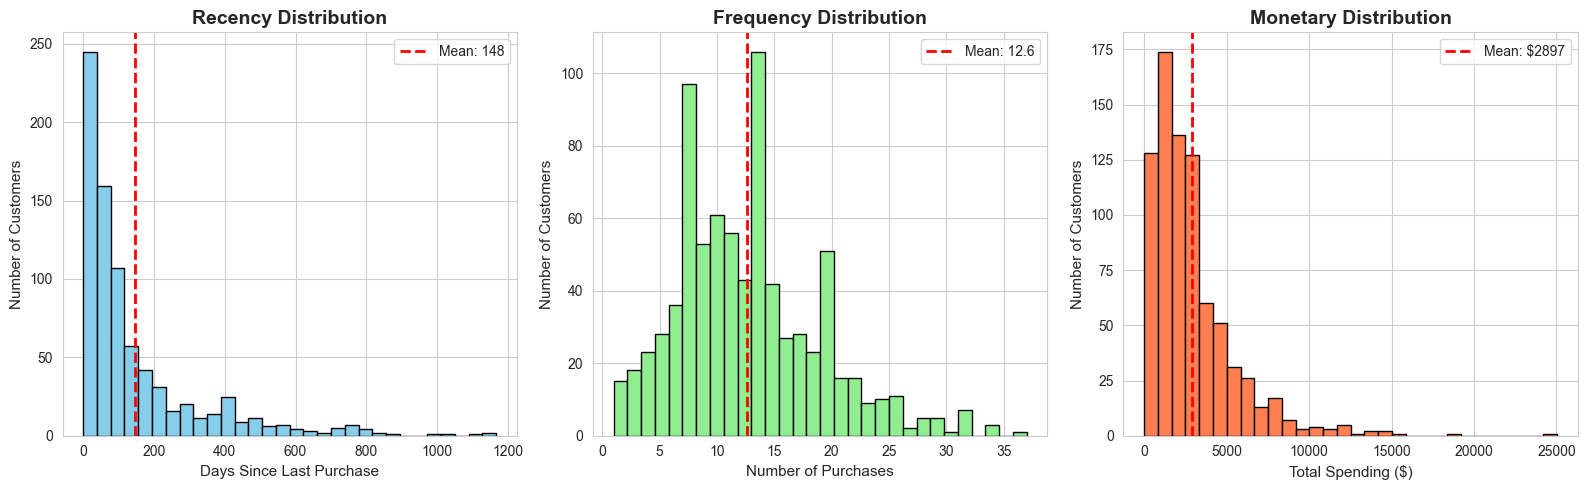

✅ RFM distribution charts created!


In [34]:
# Visualize RFM Distributions
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Recency Distribution
axes[0].hist(rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Days Since Last Purchase', fontsize=11)
axes[0].set_ylabel('Number of Customers', fontsize=11)
axes[0].axvline(rfm['Recency'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {rfm['Recency'].mean():.0f}")
axes[0].legend()

# Frequency Distribution
axes[1].hist(rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Purchases', fontsize=11)
axes[1].set_ylabel('Number of Customers', fontsize=11)
axes[1].axvline(rfm['Frequency'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {rfm['Frequency'].mean():.1f}")
axes[1].legend()

# Monetary Distribution
axes[2].hist(rfm['Monetary'], bins=30, color='coral', edgecolor='black')
axes[2].set_title('Monetary Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Total Spending ($)', fontsize=11)
axes[2].set_ylabel('Number of Customers', fontsize=11)
axes[2].axvline(rfm['Monetary'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: ${rfm['Monetary'].mean():.0f}")
axes[2].legend()

plt.tight_layout()
plt.show()

print("✅ RFM distribution charts created!")

In [35]:
# Prepare data for clustering
from sklearn.preprocessing import StandardScaler

print("🔧 PREPARING DATA FOR CLUSTERING")
print("="*50)

# Select only RFM features for clustering
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']].copy()

print("Original data (first 5 rows):")
print(rfm_features.head())

# Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Convert back to DataFrame for easier viewing
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'])

print("\n" + "="*50)
print("Scaled data (first 5 rows):")
print(rfm_scaled_df.head())

print("\n✅ Data standardized and ready for clustering!")
print(f"Shape: {rfm_scaled.shape}")

🔧 PREPARING DATA FOR CLUSTERING
Original data (first 5 rows):
   Recency  Frequency  Monetary
0      185         11  5563.560
1       20         15  1056.390
2      260         12  1790.512
3       56         18  5086.935
4      416          6   886.156

Scaled data (first 5 rows):
   Recency_Scaled  Frequency_Scaled  Monetary_Scaled
0        0.199889         -0.256912         1.015112
1       -0.686762          0.384256        -0.700590
2        0.602912         -0.096620        -0.421139
3       -0.493311          0.865131         0.833680
4        1.441199         -1.058371        -0.765391

✅ Data standardized and ready for clustering!
Shape: (793, 3)


🔍 FINDING OPTIMAL NUMBER OF CLUSTERS
K=2: Inertia = 1562.87
K=3: Inertia = 1070.05
K=4: Inertia = 830.71
K=5: Inertia = 710.57
K=6: Inertia = 617.99
K=7: Inertia = 544.73
K=8: Inertia = 492.85
K=9: Inertia = 453.02
K=10: Inertia = 421.78


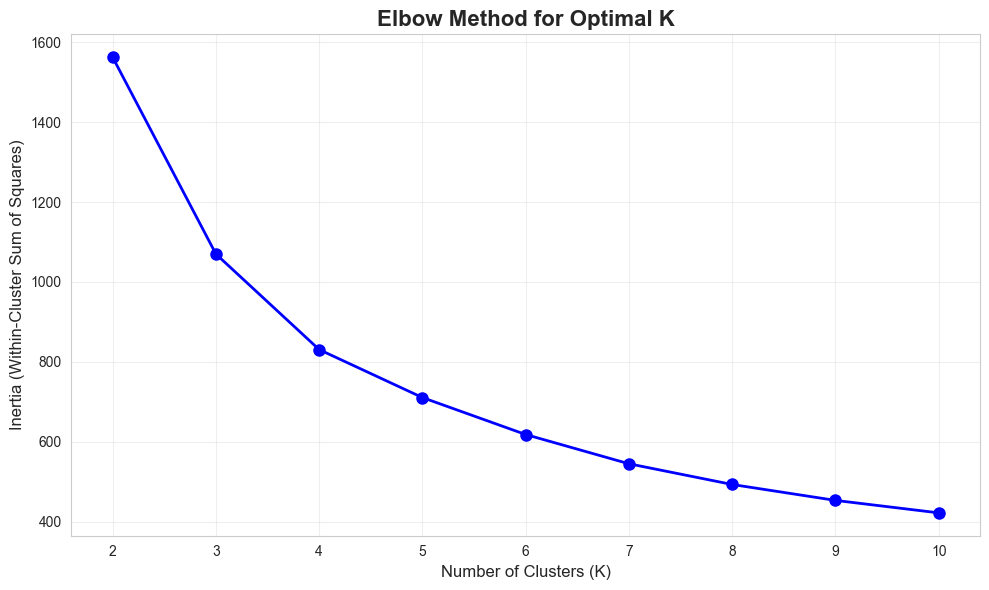


✅ Elbow curve created!
👉 Look for the 'elbow' point where the curve bends - that's the optimal K!


In [36]:
# Elbow Method to find optimal K
from sklearn.cluster import KMeans

print("🔍 FINDING OPTIMAL NUMBER OF CLUSTERS")
print("="*50)

# Calculate inertia (within-cluster sum of squares) for different K values
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
    print(f"K={k}: Inertia = {kmeans.inertia_:.2f}")

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linewidth=2, markersize=8, color='blue')
plt.title('Elbow Method for Optimal K', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Elbow curve created!")
print("👉 Look for the 'elbow' point where the curve bends - that's the optimal K!")

In [37]:
# Apply K-Means with K=4
print("🤖 APPLYING K-MEANS CLUSTERING")
print("="*50)

# Set optimal number of clusters
optimal_k = 4

# Fit K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

print(f"✅ K-Means clustering completed with K={optimal_k}")
print(f"\nCluster distribution:")
print(rfm['Cluster'].value_counts().sort_index())

# Calculate cluster statistics
print("\n" + "="*50)
print("CLUSTER PROFILES (Average values):")
print("="*50)

cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer_ID': 'count'
}).round(2)

cluster_summary.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Customer_Count']
print(cluster_summary)

🤖 APPLYING K-MEANS CLUSTERING
✅ K-Means clustering completed with K=4

Cluster distribution:
Cluster
0    277
1    105
2     63
3    348
Name: count, dtype: int64

CLUSTER PROFILES (Average values):
         Avg_Recency  Avg_Frequency  Avg_Monetary  Customer_Count
Cluster                                                          
0              73.10          17.28       3599.51             277
1             543.62           7.80       1574.66             105
2             110.73          21.14       9457.54              63
3              94.54           8.78       1548.77             348


In [38]:
# Interpret and label clusters
print("🏷️ CUSTOMER SEGMENT INTERPRETATION")
print("="*50)

# Analyze each cluster in detail
for cluster in range(optimal_k):
    cluster_data = rfm[rfm['Cluster'] == cluster]
    
    print(f"\n📊 CLUSTER {cluster}:")
    print(f"   Customer Count: {len(cluster_data)}")
    print(f"   Avg Recency: {cluster_data['Recency'].mean():.0f} days")
    print(f"   Avg Frequency: {cluster_data['Frequency'].mean():.1f} orders")
    print(f"   Avg Monetary: ${cluster_data['Monetary'].mean():,.2f}")
    print(f"   % of Total Customers: {len(cluster_data)/len(rfm)*100:.1f}%")
    print(f"   % of Total Revenue: {cluster_data['Monetary'].sum()/rfm['Monetary'].sum()*100:.1f}%")

# Assign segment names based on characteristics
def assign_segment_name(row):
    cluster = row['Cluster']
    recency = row['Recency']
    frequency = row['Frequency']
    monetary = row['Monetary']
    
    # Define segments based on RFM values
    if recency < 50 and frequency > 15 and monetary > 3500:
        return 'Champions'
    elif frequency > 10 and monetary > 2000:
        return 'Loyal Customers'
    elif recency < 100 and frequency > 5:
        return 'Potential Loyalists'
    else:
        return 'At Risk'

rfm['Segment_Name'] = rfm.apply(assign_segment_name, axis=1)

print("\n" + "="*50)
print("SEGMENT NAMES ASSIGNED:")
print(rfm['Segment_Name'].value_counts())

🏷️ CUSTOMER SEGMENT INTERPRETATION

📊 CLUSTER 0:
   Customer Count: 277
   Avg Recency: 73 days
   Avg Frequency: 17.3 orders
   Avg Monetary: $3,599.51
   % of Total Customers: 34.9%
   % of Total Revenue: 43.4%

📊 CLUSTER 1:
   Customer Count: 105
   Avg Recency: 544 days
   Avg Frequency: 7.8 orders
   Avg Monetary: $1,574.66
   % of Total Customers: 13.2%
   % of Total Revenue: 7.2%

📊 CLUSTER 2:
   Customer Count: 63
   Avg Recency: 111 days
   Avg Frequency: 21.1 orders
   Avg Monetary: $9,457.54
   % of Total Customers: 7.9%
   % of Total Revenue: 25.9%

📊 CLUSTER 3:
   Customer Count: 348
   Avg Recency: 95 days
   Avg Frequency: 8.8 orders
   Avg Monetary: $1,548.77
   % of Total Customers: 43.9%
   % of Total Revenue: 23.5%

SEGMENT NAMES ASSIGNED:
Segment_Name
Loyal Customers        294
At Risk                248
Potential Loyalists    194
Champions               57
Name: count, dtype: int64


📊 CREATING 3D VISUALIZATION OF CUSTOMER SEGMENTS


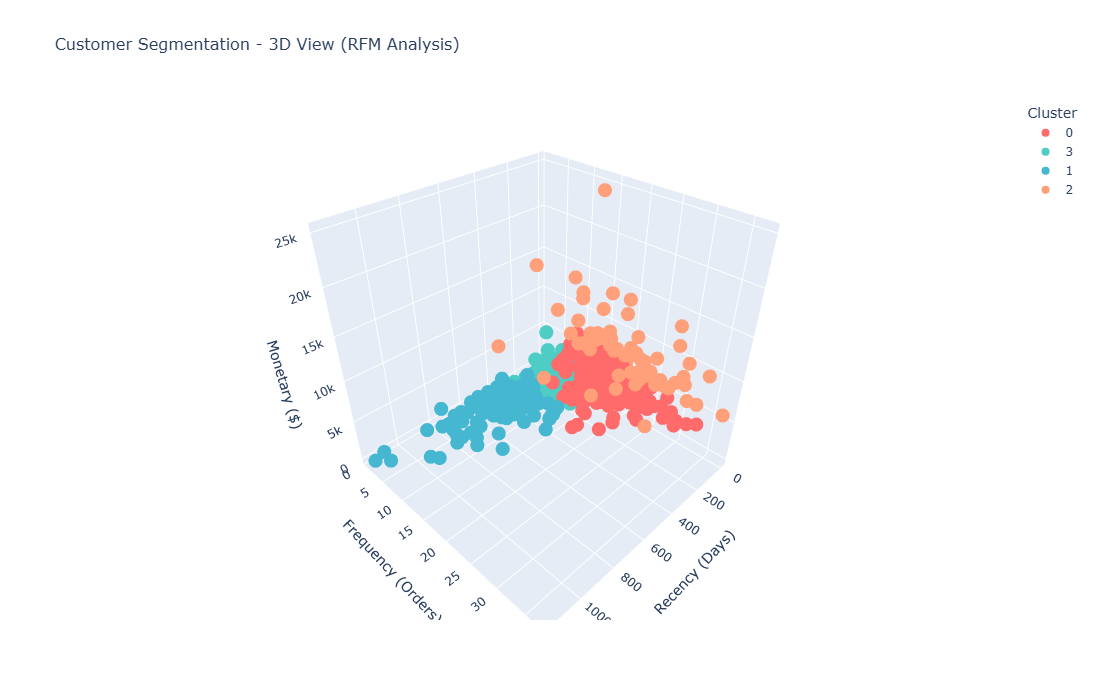

✅ Interactive 3D visualization created!
👉 You can rotate and zoom the chart!


In [40]:
# 3D Scatter Plot of Customer Segments
import plotly.express as px

print("📊 CREATING 3D VISUALIZATION OF CUSTOMER SEGMENTS")
print("="*50)

# Prepare data for visualization
rfm_viz = rfm.copy()
rfm_viz['Cluster'] = rfm_viz['Cluster'].astype(str)

# Create 3D scatter plot
fig = px.scatter_3d(rfm_viz, 
                     x='Recency', 
                     y='Frequency', 
                     z='Monetary',
                     color='Cluster',
                     hover_data=['Customer Name', 'Segment_Name'],
                     title='Customer Segmentation - 3D View (RFM Analysis)',
                     labels={'Recency': 'Recency (days)', 
                            'Frequency': 'Frequency (orders)', 
                            'Monetary': 'Monetary ($)'},
                     color_discrete_sequence=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])

fig.update_layout(
    scene=dict(
        xaxis_title='Recency (Days)',
        yaxis_title='Frequency (Orders)',
        zaxis_title='Monetary ($)'
    ),
    height=700,
    title_font_size=16
)

fig.show()

print("✅ Interactive 3D visualization created!")
print("👉 You can rotate and zoom the chart!")

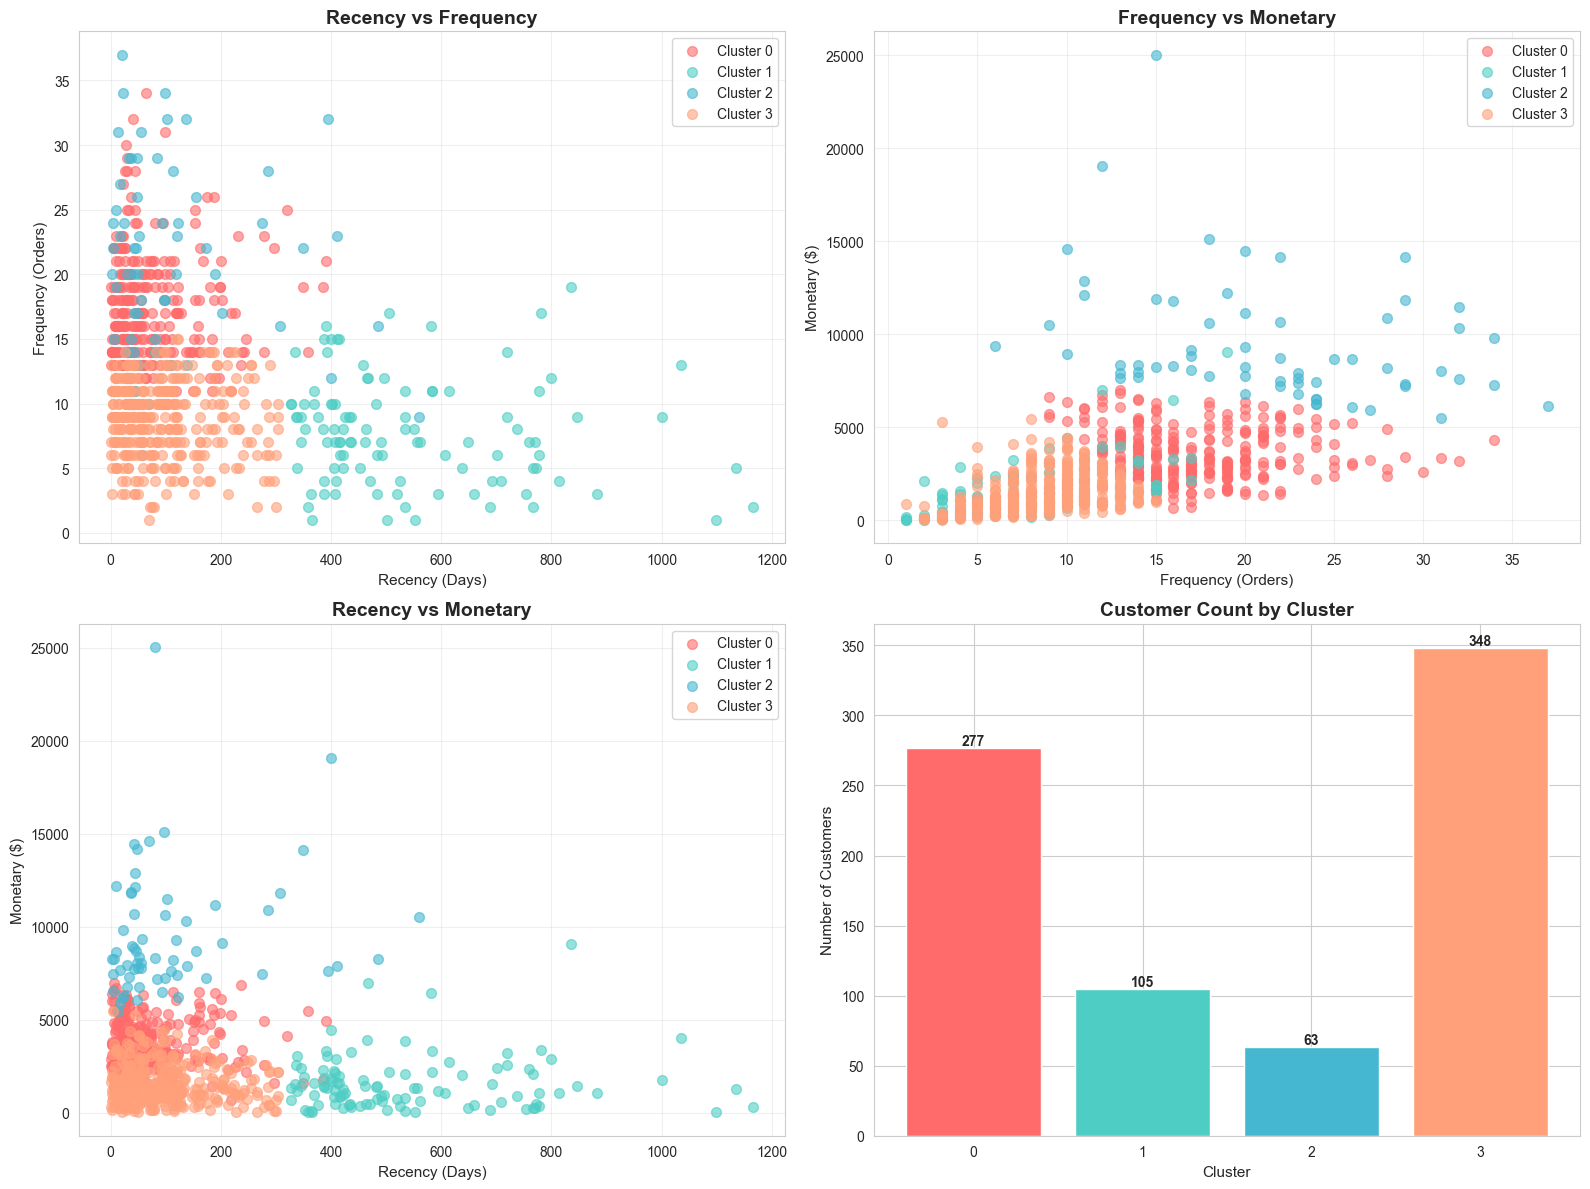

✅ 2D cluster visualizations created!


In [41]:
# 2D Visualizations of Clusters
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Color map for clusters
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# 1. Recency vs Frequency
for cluster in range(optimal_k):
    cluster_data = rfm[rfm['Cluster'] == cluster]
    axes[0, 0].scatter(cluster_data['Recency'], cluster_data['Frequency'], 
                       c=colors[cluster], label=f'Cluster {cluster}', s=50, alpha=0.6)
axes[0, 0].set_xlabel('Recency (Days)', fontsize=11)
axes[0, 0].set_ylabel('Frequency (Orders)', fontsize=11)
axes[0, 0].set_title('Recency vs Frequency', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Frequency vs Monetary
for cluster in range(optimal_k):
    cluster_data = rfm[rfm['Cluster'] == cluster]
    axes[0, 1].scatter(cluster_data['Frequency'], cluster_data['Monetary'], 
                       c=colors[cluster], label=f'Cluster {cluster}', s=50, alpha=0.6)
axes[0, 1].set_xlabel('Frequency (Orders)', fontsize=11)
axes[0, 1].set_ylabel('Monetary ($)', fontsize=11)
axes[0, 1].set_title('Frequency vs Monetary', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Recency vs Monetary
for cluster in range(optimal_k):
    cluster_data = rfm[rfm['Cluster'] == cluster]
    axes[1, 0].scatter(cluster_data['Recency'], cluster_data['Monetary'], 
                       c=colors[cluster], label=f'Cluster {cluster}', s=50, alpha=0.6)
axes[1, 0].set_xlabel('Recency (Days)', fontsize=11)
axes[1, 0].set_ylabel('Monetary ($)', fontsize=11)
axes[1, 0].set_title('Recency vs Monetary', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Cluster Size Distribution
cluster_counts = rfm['Cluster'].value_counts().sort_index()
axes[1, 1].bar(cluster_counts.index.astype(str), cluster_counts.values, color=colors)
axes[1, 1].set_xlabel('Cluster', fontsize=11)
axes[1, 1].set_ylabel('Number of Customers', fontsize=11)
axes[1, 1].set_title('Customer Count by Cluster', fontsize=14, fontweight='bold')
for i, v in enumerate(cluster_counts.values):
    axes[1, 1].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ 2D cluster visualizations created!")

💰 REVENUE CONTRIBUTION BY CUSTOMER SEGMENT
         Total_Revenue  Customer_Count  Revenue_Per_Customer  \
Cluster                                                        
0            997063.41             277               3599.51   
1            165339.17             105               1574.66   
2            595824.98              63               9457.54   
3            538973.29             348               1548.77   

         Revenue_Percentage  Customer_Percentage  
Cluster                                           
0                     43.40                34.93  
1                      7.20                13.24  
2                     25.94                 7.94  
3                     23.46                43.88  


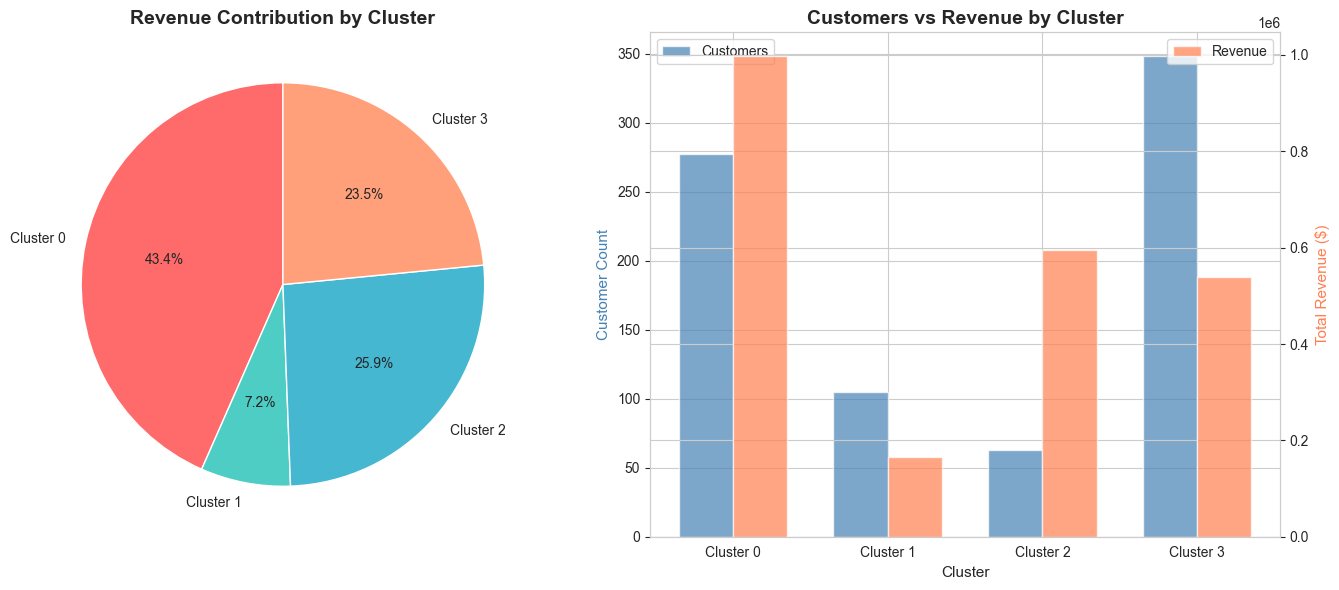


✅ Revenue analysis charts created!


In [42]:
# Revenue Contribution Analysis
print("💰 REVENUE CONTRIBUTION BY CUSTOMER SEGMENT")
print("="*50)

segment_revenue = rfm.groupby('Cluster').agg({
    'Monetary': 'sum',
    'Customer_ID': 'count'
}).round(2)

segment_revenue.columns = ['Total_Revenue', 'Customer_Count']
segment_revenue['Revenue_Per_Customer'] = (segment_revenue['Total_Revenue'] / segment_revenue['Customer_Count']).round(2)
segment_revenue['Revenue_Percentage'] = (segment_revenue['Total_Revenue'] / segment_revenue['Total_Revenue'].sum() * 100).round(2)
segment_revenue['Customer_Percentage'] = (segment_revenue['Customer_Count'] / segment_revenue['Customer_Count'].sum() * 100).round(2)

print(segment_revenue)

# Visualize Revenue Contribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart - Revenue by Cluster
ax1.pie(segment_revenue['Total_Revenue'], 
        labels=[f'Cluster {i}' for i in segment_revenue.index],
        autopct='%1.1f%%',
        colors=colors,
        startangle=90)
ax1.set_title('Revenue Contribution by Cluster', fontsize=14, fontweight='bold')

# Bar chart - Customer Count vs Revenue
x = np.arange(len(segment_revenue))
width = 0.35

ax2_twin = ax2.twinx()
bars1 = ax2.bar(x - width/2, segment_revenue['Customer_Count'], width, label='Customers', color='steelblue', alpha=0.7)
bars2 = ax2_twin.bar(x + width/2, segment_revenue['Total_Revenue'], width, label='Revenue', color='coral', alpha=0.7)

ax2.set_xlabel('Cluster', fontsize=11)
ax2.set_ylabel('Customer Count', fontsize=11, color='steelblue')
ax2_twin.set_ylabel('Total Revenue ($)', fontsize=11, color='coral')
ax2.set_title('Customers vs Revenue by Cluster', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([f'Cluster {i}' for i in segment_revenue.index])
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("\n✅ Revenue analysis charts created!")

📈 PARETO ANALYSIS (80/20 RULE)
Top 49.9% of customers generate 80% of revenue
That's 396 out of 793 customers

Top 20% of customers (158 customers) generate 48.0% of revenue
Revenue from top 20%: $1,101,781.39


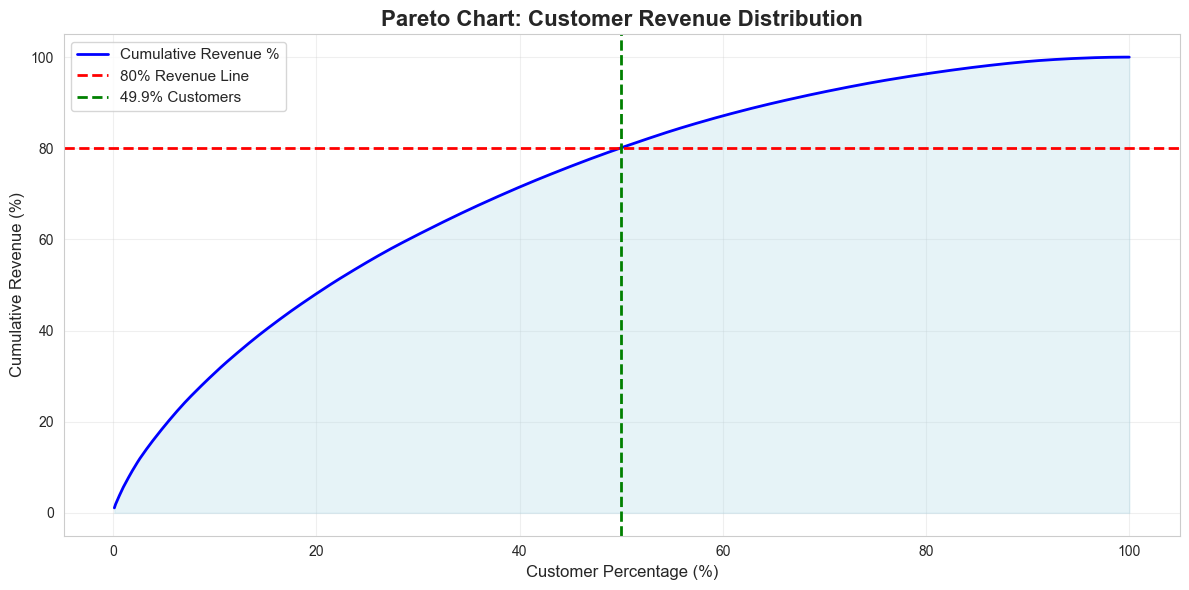


✅ Pareto analysis chart created!


In [43]:
# Pareto Analysis - Top 20% Customers
print("📈 PARETO ANALYSIS (80/20 RULE)")
print("="*50)

# Sort customers by monetary value
rfm_sorted = rfm.sort_values('Monetary', ascending=False).reset_index(drop=True)

# Calculate cumulative percentage
rfm_sorted['Cumulative_Revenue'] = rfm_sorted['Monetary'].cumsum()
rfm_sorted['Cumulative_Revenue_Pct'] = (rfm_sorted['Cumulative_Revenue'] / rfm_sorted['Monetary'].sum() * 100)
rfm_sorted['Customer_Pct'] = ((rfm_sorted.index + 1) / len(rfm_sorted) * 100)

# Find what % of customers generate 80% of revenue
revenue_80_idx = rfm_sorted[rfm_sorted['Cumulative_Revenue_Pct'] >= 80].index[0]
customer_pct_for_80_revenue = (revenue_80_idx + 1) / len(rfm_sorted) * 100

print(f"Top {customer_pct_for_80_revenue:.1f}% of customers generate 80% of revenue")
print(f"That's {revenue_80_idx + 1} out of {len(rfm_sorted)} customers")

# Top 20% customers
top_20_pct_count = int(len(rfm_sorted) * 0.20)
top_20_revenue = rfm_sorted.head(top_20_pct_count)['Monetary'].sum()
top_20_revenue_pct = (top_20_revenue / rfm_sorted['Monetary'].sum() * 100)

print(f"\nTop 20% of customers ({top_20_pct_count} customers) generate {top_20_revenue_pct:.1f}% of revenue")
print(f"Revenue from top 20%: ${top_20_revenue:,.2f}")

# Visualize Pareto Chart
plt.figure(figsize=(12, 6))
plt.plot(rfm_sorted['Customer_Pct'], rfm_sorted['Cumulative_Revenue_Pct'], 
         linewidth=2, color='blue', label='Cumulative Revenue %')
plt.axhline(y=80, color='red', linestyle='--', linewidth=2, label='80% Revenue Line')
plt.axvline(x=customer_pct_for_80_revenue, color='green', linestyle='--', linewidth=2, 
            label=f'{customer_pct_for_80_revenue:.1f}% Customers')
plt.fill_between(rfm_sorted['Customer_Pct'], 0, rfm_sorted['Cumulative_Revenue_Pct'], 
                 alpha=0.3, color='lightblue')

plt.xlabel('Customer Percentage (%)', fontsize=12)
plt.ylabel('Cumulative Revenue (%)', fontsize=12)
plt.title('Pareto Chart: Customer Revenue Distribution', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Pareto analysis chart created!")

In [44]:
# Final Comprehensive Segment Summary
print("📋 FINAL CUSTOMER SEGMENTATION REPORT")
print("="*70)

for cluster in range(optimal_k):
    cluster_data = rfm[rfm['Cluster'] == cluster]
    
    print(f"\n{'='*70}")
    print(f"🎯 CLUSTER {cluster}")
    print(f"{'='*70}")
    
    # Basic metrics
    print(f"Customer Count: {len(cluster_data)} ({len(cluster_data)/len(rfm)*100:.1f}% of total)")
    print(f"Total Revenue: ${cluster_data['Monetary'].sum():,.2f} ({cluster_data['Monetary'].sum()/rfm['Monetary'].sum()*100:.1f}% of total)")
    print(f"Average Revenue per Customer: ${cluster_data['Monetary'].mean():,.2f}")
    
    print(f"\n📊 RFM Metrics:")
    print(f"   Recency: {cluster_data['Recency'].mean():.0f} days (min: {cluster_data['Recency'].min()}, max: {cluster_data['Recency'].max()})")
    print(f"   Frequency: {cluster_data['Frequency'].mean():.1f} orders (min: {cluster_data['Frequency'].min()}, max: {cluster_data['Frequency'].max()})")
    print(f"   Monetary: ${cluster_data['Monetary'].mean():,.2f} (min: ${cluster_data['Monetary'].min():.2f}, max: ${cluster_data['Monetary'].max():.2f})")
    
    # Characteristics
    print(f"\n🔍 Segment Characteristics:")
    if cluster_data['Recency'].mean() < rfm['Recency'].mean():
        print(f"   ✓ Recently active (purchased within last {cluster_data['Recency'].mean():.0f} days)")
    else:
        print(f"   ✗ Not very active recently (last purchase {cluster_data['Recency'].mean():.0f} days ago)")
    
    if cluster_data['Frequency'].mean() > rfm['Frequency'].mean():
        print(f"   ✓ High purchase frequency (above average)")
    else:
        print(f"   ○ Moderate/Low purchase frequency")
    
    if cluster_data['Monetary'].mean() > rfm['Monetary'].mean():
        print(f"   ✓ High spenders (above average)")
    else:
        print(f"   ○ Average/Low spenders")
    
    # Top 3 customers in this cluster
    print(f"\n👥 Top 3 Customers in this Cluster:")
    top_3 = cluster_data.nlargest(3, 'Monetary')[['Customer Name', 'Monetary', 'Frequency', 'Recency']]
    for idx, (i, row) in enumerate(top_3.iterrows(), 1):
        print(f"   {idx}. {row['Customer Name']}: ${row['Monetary']:,.2f} | {int(row['Frequency'])} orders | {int(row['Recency'])} days ago")

print(f"\n{'='*70}")
print("✅ SEGMENTATION COMPLETE!")
print(f"{'='*70}")

📋 FINAL CUSTOMER SEGMENTATION REPORT

🎯 CLUSTER 0
Customer Count: 277 (34.9% of total)
Total Revenue: $997,063.41 (43.4% of total)
Average Revenue per Customer: $3,599.51

📊 RFM Metrics:
   Recency: 73 days (min: 1, max: 391)
   Frequency: 17.3 orders (min: 9, max: 34)
   Monetary: $3,599.51 (min: $659.14, max: $6987.20)

🔍 Segment Characteristics:
   ✓ Recently active (purchased within last 73 days)
   ✓ High purchase frequency (above average)
   ✓ High spenders (above average)

👥 Top 3 Customers in this Cluster:
   1. Fred Hopkins: $6,987.20 | 13 orders | 6 days ago
   2. Penelope Sewall: $6,843.63 | 13 orders | 237 days ago
   3. Yana Sorensen: $6,720.44 | 12 orders | 10 days ago

🎯 CLUSTER 1
Customer Count: 105 (13.2% of total)
Total Revenue: $165,339.17 (7.2% of total)
Average Revenue per Customer: $1,574.66

📊 RFM Metrics:
   Recency: 544 days (min: 328, max: 1166)
   Frequency: 7.8 orders (min: 1, max: 19)
   Monetary: $1,574.66 (min: $4.83, max: $9062.86)

🔍 Segment Characteris

In [45]:
# Save segmentation results
print("💾 SAVING SEGMENTATION RESULTS")
print("="*50)

# Prepare final dataset with all information
rfm_final = rfm[['Customer_ID', 'Customer Name', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment_Name']].copy()

# Save to CSV
output_file = '../outputs/customer_segmentation_results.csv'
rfm_final.to_csv(output_file, index=False)

print(f"✅ Results saved to: {output_file}")
print(f"Total customers segmented: {len(rfm_final)}")
print(f"\nFile contains:")
print(f"   - Customer ID")
print(f"   - Customer Name")
print(f"   - Recency (days)")
print(f"   - Frequency (orders)")
print(f"   - Monetary (total spending)")
print(f"   - Cluster (0-3)")
print(f"   - Segment Name")

# Display sample
print("\nSample of saved data:")
print(rfm_final.head(10))

💾 SAVING SEGMENTATION RESULTS


OSError: Cannot save file into a non-existent directory: '..\outputs'

In [46]:
# Create outputs folder if it doesn't exist
import os

# Create outputs directory
if not os.path.exists('outputs'):
    os.makedirs('outputs')
    print("✅ 'outputs' folder created!")
else:
    print("✅ 'outputs' folder already exists!")

# Now save the file
rfm_final = rfm[['Customer_ID', 'Customer Name', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment_Name']].copy()

output_file = 'outputs/customer_segmentation_results.csv'
rfm_final.to_csv(output_file, index=False)

print(f"\n✅ Results saved to: {output_file}")
print(f"Total customers segmented: {len(rfm_final)}")

print("\nSample of saved data:")
print(rfm_final.head(10))

✅ 'outputs' folder already exists!

✅ Results saved to: outputs/customer_segmentation_results.csv
Total customers segmented: 793

Sample of saved data:
  Customer_ID         Customer Name  Recency  Frequency   Monetary  Cluster  \
0    AA-10315            Alex Avila      185         11   5563.560        0   
1    AA-10375          Allen Armold       20         15   1056.390        0   
2    AA-10480          Andrew Allen      260         12   1790.512        3   
3    AA-10645         Anna Andreadi       56         18   5086.935        0   
4    AB-10015         Aaron Bergman      416          6    886.156        1   
5    AB-10060       Adam Bellavance       55         18   7755.620        2   
6    AB-10105         Adrian Barton       42         20  14473.571        2   
7    AB-10150           Aimee Bixby       42         12    966.710        3   
8    AB-10165           Alan Barnes       26         14   1113.838        3   
9    AB-10255  Alejandro Ballentine      167         14   

In [47]:
# Executive Summary
print("="*70)
print(" " * 15 + "📊 EXECUTIVE SUMMARY")
print("="*70)

print("\n🎯 PROJECT OVERVIEW:")
print("-" * 70)
print(f"Analysis Period: {df['Order Date'].min().date()} to {df['Order Date'].max().date()}")
print(f"Total Transactions: {len(df):,}")
print(f"Total Customers: {df['Customer ID'].nunique():,}")
print(f"Total Revenue: ${df['Sales'].sum():,.2f}")
print(f"Total Profit: ${df['Profit'].sum():,.2f}")
print(f"Overall Profit Margin: {(df['Profit'].sum()/df['Sales'].sum())*100:.2f}%")

print("\n\n💡 KEY FINDINGS:")
print("-" * 70)

# Finding 1: Category Performance
print("\n1. PRODUCT CATEGORY PERFORMANCE:")
cat_perf = df.groupby('Category').agg({'Sales':'sum', 'Profit':'sum'})
cat_perf['Margin'] = (cat_perf['Profit']/cat_perf['Sales']*100)
best_cat = cat_perf['Margin'].idxmax()
worst_cat = cat_perf['Margin'].idxmin()
print(f"   ✓ Best: {best_cat} (Profit Margin: {cat_perf.loc[best_cat, 'Margin']:.2f}%)")
print(f"   ✗ Worst: {worst_cat} (Profit Margin: {cat_perf.loc[worst_cat, 'Margin']:.2f}%)")

# Finding 2: Discount Impact
print("\n2. DISCOUNT IMPACT:")
high_discount = df[df['Discount'] > 0.3]
print(f"   ⚠️ Orders with 30%+ discount: {len(high_discount):,}")
print(f"   💸 Total loss from high discounts: ${high_discount['Profit'].sum():,.2f}")

               📊 EXECUTIVE SUMMARY

🎯 PROJECT OVERVIEW:
----------------------------------------------------------------------
Analysis Period: 2014-01-03 to 2017-12-30
Total Transactions: 9,994
Total Customers: 793
Total Revenue: $2,297,200.86
Total Profit: $286,397.02
Overall Profit Margin: 12.47%


💡 KEY FINDINGS:
----------------------------------------------------------------------

1. PRODUCT CATEGORY PERFORMANCE:
   ✓ Best: Technology (Profit Margin: 17.40%)
   ✗ Worst: Furniture (Profit Margin: 2.49%)

2. DISCOUNT IMPACT:
   ⚠️ Orders with 30%+ discount: 1,166
   💸 Total loss from high discounts: $-125,006.78


In [48]:
# Strategic Business Recommendations
print("="*70)
print(" " * 15 + "💼 STRATEGIC RECOMMENDATIONS")
print("="*70)

print("\n🎯 RECOMMENDATION 1: OPTIMIZE DISCOUNT STRATEGY")
print("-" * 70)
print("Current Issue:")
print("   • Discounts >20% are causing significant losses")
print("   • 30%+ discounts lose an average of $107 per order")
print("\nRecommended Actions:")
print("   ✓ Cap maximum discount at 20%")
print("   ✓ Implement tiered discount structure: 0-10% (best margin)")
print("   ✓ Use personalized discounts for high-value customers only")
print("   ✓ Replace blanket discounts with value-added bundles")
print("\nExpected Impact:")
print("   💰 Potential profit increase: 8-12%")
print("   📊 Improved overall margin from 12.47% to ~14%")

print("\n\n🎯 RECOMMENDATION 2: FOCUS ON FURNITURE CATEGORY")
print("-" * 70)
print("Current Issue:")
cat_perf = df.groupby('Category').agg({'Sales':'sum', 'Profit':'sum'})
cat_perf['Margin'] = (cat_perf['Profit']/cat_perf['Sales']*100)
print(f"   • Furniture has only {cat_perf.loc['Furniture', 'Margin']:.2f}% profit margin")
print(f"   • Despite ${cat_perf.loc['Furniture', 'Sales']:,.0f} in sales")
print("\nRecommended Actions:")
print("   ✓ Review furniture supplier pricing and negotiate better terms")
print("   ✓ Reduce high-discount furniture promotions")
print("   ✓ Focus on higher-margin furniture sub-categories")
print("   ✓ Consider phasing out low-margin furniture items")
print("\nExpected Impact:")
print("   💰 Target: Increase furniture margin to 8-10%")
print("   📈 Additional annual profit: $40,000-$60,000")

print("\n\n🎯 RECOMMENDATION 3: CUSTOMER RETENTION PROGRAM")
print("-" * 70)
print("Current Opportunity:")
segment_counts = rfm['Segment_Name'].value_counts()
for segment, count in segment_counts.items():
    print(f"   • {segment}: {count} customers ({count/len(rfm)*100:.1f}%)")
print("\nRecommended Actions:")
print("   ✓ Champions: VIP program with exclusive benefits")
print("   ✓ Loyal Customers: Loyalty points and early access to new products")
print("   ✓ Potential Loyalists: Engagement campaigns and personalized offers")
print("   ✓ At Risk: Win-back campaigns with targeted incentives")
print("\nExpected Impact:")
print("   📊 Reduce churn by 15-20%")
print("   💰 Increase customer lifetime value by 25%")
print("   🎯 Improve repeat purchase rate from current levels")

print("\n\n🎯 RECOMMENDATION 4: PRIORITIZE HIGH-VALUE CUSTOMERS")
print("-" * 70)
print("Current Data:")
top_20_pct = int(len(rfm) * 0.20)
top_20_customers = rfm.nlargest(top_20_pct, 'Monetary')
print(f"   • Top 20% customers: {top_20_pct} out of {len(rfm)}")
print(f"   • Their revenue contribution: {(top_20_customers['Monetary'].sum()/rfm['Monetary'].sum()*100):.1f}%")
print(f"   • Average spending: ${top_20_customers['Monetary'].mean():,.2f}")
print("\nRecommended Actions:")
print("   ✓ Assign dedicated account managers to top 100 customers")
print("   ✓ Quarterly business reviews with key accounts")
print("   ✓ Priority customer service and faster shipping")
print("   ✓ Exclusive product previews and custom pricing")
print("\nExpected Impact:")
print("   💰 Increase top customer spending by 10-15%")
print("   🎯 Improve customer satisfaction scores")
print("   📈 Additional annual revenue: $300,000-$400,000")

print("\n\n🎯 RECOMMENDATION 5: SEASONAL INVENTORY PLANNING")
print("-" * 70)
monthly_sales = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
top_months = monthly_sales.head(3)
print("Current Pattern:")
print("   Top 3 Sales Months:")
month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
               7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
for month, sales in top_months.items():
    print(f"   • {month_names[month]}: ${sales:,.0f}")
print("\nRecommended Actions:")
print("   ✓ Increase inventory 30-40% before peak months")
print("   ✓ Pre-order campaigns for Q4 holiday season")
print("   ✓ Optimize warehouse space for seasonal demand")
print("   ✓ Hire temporary staff for peak periods")
print("\nExpected Impact:")
print("   📦 Reduce stockouts by 25%")
print("   💰 Capture additional $150,000 in peak season sales")
print("   ⚡ Improve order fulfillment speed")

print("\n" + "="*70)
print("✅ RECOMMENDATIONS REPORT COMPLETE")
print("="*70)

               💼 STRATEGIC RECOMMENDATIONS

🎯 RECOMMENDATION 1: OPTIMIZE DISCOUNT STRATEGY
----------------------------------------------------------------------
Current Issue:
   • Discounts >20% are causing significant losses
   • 30%+ discounts lose an average of $107 per order

Recommended Actions:
   ✓ Cap maximum discount at 20%
   ✓ Implement tiered discount structure: 0-10% (best margin)
   ✓ Use personalized discounts for high-value customers only
   ✓ Replace blanket discounts with value-added bundles

Expected Impact:
   💰 Potential profit increase: 8-12%
   📊 Improved overall margin from 12.47% to ~14%


🎯 RECOMMENDATION 2: FOCUS ON FURNITURE CATEGORY
----------------------------------------------------------------------
Current Issue:
   • Furniture has only 2.49% profit margin
   • Despite $742,000 in sales

Recommended Actions:
   ✓ Review furniture supplier pricing and negotiate better terms
   ✓ Reduce high-discount furniture promotions
   ✓ Focus on higher-margin furn

In [49]:
# Implementation Roadmap
print("="*70)
print(" " * 15 + "📅 IMPLEMENTATION ROADMAP")
print("="*70)

print("\n🚀 PHASE 1: IMMEDIATE ACTIONS (0-30 Days)")
print("-" * 70)
print("Week 1-2:")
print("   ☐ Audit current discount policies")
print("   ☐ Identify top 100 high-value customers")
print("   ☐ Analyze furniture category profitability by sub-category")
print("\nWeek 3-4:")
print("   ☐ Implement 20% discount cap policy")
print("   ☐ Launch win-back campaign for At-Risk customers")
print("   ☐ Send personalized emails to Champions segment")
print("\nExpected Quick Wins:")
print("   💰 Immediate reduction in discount-related losses")
print("   📊 Initial engagement with high-value customers")

print("\n\n🚀 PHASE 2: SHORT-TERM INITIATIVES (1-3 Months)")
print("-" * 70)
print("Month 1:")
print("   ☐ Design and launch VIP/Loyalty program")
print("   ☐ Renegotiate furniture supplier contracts")
print("   ☐ Assign account managers to top customers")
print("\nMonth 2:")
print("   ☐ Develop customer segmentation marketing campaigns")
print("   ☐ Create seasonal inventory forecasting model")
print("   ☐ Train sales team on new discount policies")
print("\nMonth 3:")
print("   ☐ Launch personalized email campaigns by segment")
print("   ☐ Implement priority customer service for Champions")
print("   ☐ Review and optimize furniture product mix")
print("\nExpected Results:")
print("   📈 5-8% improvement in profit margin")
print("   👥 15% increase in customer engagement")

print("\n\n🚀 PHASE 3: MEDIUM-TERM GROWTH (3-6 Months)")
print("-" * 70)
print("Month 4-5:")
print("   ☐ Analyze loyalty program performance and iterate")
print("   ☐ Expand inventory for identified peak seasons")
print("   ☐ Launch quarterly business reviews with top 50 customers")
print("\nMonth 6:")
print("   ☐ Full review of all recommendations")
print("   ☐ Measure ROI and KPI improvements")
print("   ☐ Plan next phase of optimization")
print("\nExpected Results:")
print("   💰 10-15% overall profit increase")
print("   🎯 20% improvement in customer retention")
print("   📊 Sustainable growth trajectory established")

print("\n\n🚀 PHASE 4: LONG-TERM STRATEGY (6-12 Months)")
print("-" * 70)
print("   ☐ Scale successful initiatives company-wide")
print("   ☐ Develop predictive analytics for customer behavior")
print("   ☐ Explore new market segments and product lines")
print("   ☐ Build advanced personalization engine")
print("   ☐ Consider geographic expansion based on regional data")
print("\nExpected Results:")
print("   🚀 Market leadership position")
print("   💎 Premium customer experience")
print("   📈 25%+ annual revenue growth")

print("\n" + "="*70)

               📅 IMPLEMENTATION ROADMAP

🚀 PHASE 1: IMMEDIATE ACTIONS (0-30 Days)
----------------------------------------------------------------------
Week 1-2:
   ☐ Audit current discount policies
   ☐ Identify top 100 high-value customers
   ☐ Analyze furniture category profitability by sub-category

Week 3-4:
   ☐ Implement 20% discount cap policy
   ☐ Launch win-back campaign for At-Risk customers
   ☐ Send personalized emails to Champions segment

Expected Quick Wins:
   💰 Immediate reduction in discount-related losses
   📊 Initial engagement with high-value customers


🚀 PHASE 2: SHORT-TERM INITIATIVES (1-3 Months)
----------------------------------------------------------------------
Month 1:
   ☐ Design and launch VIP/Loyalty program
   ☐ Renegotiate furniture supplier contracts
   ☐ Assign account managers to top customers

Month 2:
   ☐ Develop customer segmentation marketing campaigns
   ☐ Create seasonal inventory forecasting model
   ☐ Train sales team on new discount po

In [50]:
# KPI Tracking Dashboard
print("="*70)
print(" " * 15 + "📊 KEY PERFORMANCE INDICATORS (KPIs)")
print("="*70)

print("\n💰 FINANCIAL METRICS")
print("-" * 70)
print(f"{'Metric':<40} {'Current':<20} {'Target':<20}")
print("-" * 70)
current_revenue = df['Sales'].sum()
current_profit = df['Profit'].sum()
current_margin = (current_profit/current_revenue)*100

print(f"{'Total Revenue':<40} ${current_revenue:>18,.0f} ${current_revenue*1.20:>18,.0f}")
print(f"{'Total Profit':<40} ${current_profit:>18,.0f} ${current_profit*1.30:>18,.0f}")
print(f"{'Profit Margin':<40} {current_margin:>18.2f}% {current_margin*1.15:>18.2f}%")
print(f"{'Average Order Value':<40} ${df['Sales'].sum()/df['Order ID'].nunique():>18,.2f} ${(df['Sales'].sum()/df['Order ID'].nunique())*1.10:>18,.2f}")

print("\n\n👥 CUSTOMER METRICS")
print("-" * 70)
print(f"{'Metric':<40} {'Current':<20} {'Target':<20}")
print("-" * 70)
total_customers = df['Customer ID'].nunique()
avg_clv = rfm['Monetary'].mean()
repeat_rate = (len(rfm[rfm['Frequency'] > 1]) / len(rfm) * 100)

print(f"{'Total Active Customers':<40} {total_customers:>18,} {int(total_customers*1.15):>18,}")
print(f"{'Average Customer Lifetime Value':<40} ${avg_clv:>18,.2f} ${avg_clv*1.25:>18,.2f}")
print(f"{'Repeat Purchase Rate':<40} {repeat_rate:>18.1f}% {repeat_rate*1.10:>18.1f}%")
print(f"{'Customer Retention Rate':<40} {'TBD':>18} {'85%+':>18}")

print("\n\n📦 OPERATIONAL METRICS")
print("-" * 70)
print(f"{'Metric':<40} {'Current':<20} {'Target':<20}")
print("-" * 70)
avg_discount = df[df['Discount'] > 0]['Discount'].mean() * 100
high_discount_pct = (len(df[df['Discount'] > 0.20]) / len(df) * 100)

print(f"{'Average Discount %':<40} {avg_discount:>18.1f}% {10.0:>18.1f}%")
print(f"{'Orders with >20% Discount':<40} {high_discount_pct:>18.1f}% {5.0:>18.1f}%")
print(f"{'Order Fulfillment Time':<40} {'TBD':>18} {'<3 days':>18}")
print(f"{'Inventory Turnover Rate':<40} {'TBD':>18} {'8-10x/year':>18}")

print("\n\n🎯 SEGMENT-SPECIFIC METRICS")
print("-" * 70)
segment_summary = rfm.groupby('Segment_Name').agg({
    'Customer_ID': 'count',
    'Monetary': 'sum'
})
segment_summary.columns = ['Count', 'Revenue']
segment_summary['Avg_Revenue'] = segment_summary['Revenue'] / segment_summary['Count']

print(f"{'Segment':<25} {'Customers':<15} {'Revenue':<20} {'Avg/Customer':<15}")
print("-" * 70)
for segment, row in segment_summary.iterrows():
    print(f"{segment:<25} {int(row['Count']):<15} ${row['Revenue']:<19,.0f} ${row['Avg_Revenue']:<14,.0f}")

print("\n\n📈 GROWTH TARGETS (12-Month Goals)")
print("-" * 70)
print("   • Revenue Growth: +20-25%")
print("   • Profit Growth: +30-35%")
print("   • Customer Acquisition: +15%")
print("   • Customer Retention: +20%")
print("   • Average Order Value: +10%")
print("   • Champions Segment Size: +25%")
print("   • Furniture Category Margin: 2.5% → 8%")

print("\n" + "="*70)
print("✅ KPI DASHBOARD TEMPLATE COMPLETE")
print("="*70)

               📊 KEY PERFORMANCE INDICATORS (KPIs)

💰 FINANCIAL METRICS
----------------------------------------------------------------------
Metric                                   Current              Target              
----------------------------------------------------------------------
Total Revenue                            $         2,297,201 $         2,756,641
Total Profit                             $           286,397 $           372,316
Profit Margin                                         12.47%              14.34%
Average Order Value                      $            458.61 $            504.48


👥 CUSTOMER METRICS
----------------------------------------------------------------------
Metric                                   Current              Target              
----------------------------------------------------------------------
Total Active Customers                                  793                911
Average Customer Lifetime Value          $          2,

In [51]:
# Save comprehensive report to file
from datetime import datetime

print("💾 SAVING FINAL REPORT")
print("="*70)

report_file = 'outputs/Retail_Sales_Analysis_Report.txt'

with open(report_file, 'w') as f:
    f.write("="*70 + "\n")
    f.write(" " * 10 + "RETAIL SALES DATA ANALYSIS & CUSTOMER SEGMENTATION\n")
    f.write(" " * 20 + "COMPREHENSIVE BUSINESS REPORT\n")
    f.write("="*70 + "\n\n")
    
    f.write(f"Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Analysis Period: {df['Order Date'].min().date()} to {df['Order Date'].max().date()}\n")
    f.write(f"Analyst: Data Science Project\n\n")
    
    # Executive Summary
    f.write("\n" + "="*70 + "\n")
    f.write("1. EXECUTIVE SUMMARY\n")
    f.write("="*70 + "\n\n")
    f.write(f"Total Transactions: {len(df):,}\n")
    f.write(f"Total Customers: {df['Customer ID'].nunique():,}\n")
    f.write(f"Total Revenue: ${df['Sales'].sum():,.2f}\n")
    f.write(f"Total Profit: ${df['Profit'].sum():,.2f}\n")
    f.write(f"Overall Profit Margin: {(df['Profit'].sum()/df['Sales'].sum())*100:.2f}%\n")
    
    # Key Findings
    f.write("\n" + "="*70 + "\n")
    f.write("2. KEY FINDINGS\n")
    f.write("="*70 + "\n\n")
    
    f.write("2.1 Category Performance:\n")
    cat_perf = df.groupby('Category').agg({'Sales':'sum', 'Profit':'sum'})
    cat_perf['Margin'] = (cat_perf['Profit']/cat_perf['Sales']*100)
    for cat in cat_perf.index:
        f.write(f"   - {cat}: ${cat_perf.loc[cat, 'Sales']:,.0f} sales, {cat_perf.loc[cat, 'Margin']:.2f}% margin\n")
    
    f.write("\n2.2 Customer Segmentation:\n")
    f.write(f"   - Total customers segmented: {len(rfm):,}\n")
    f.write(f"   - Number of segments: {rfm['Cluster'].nunique()}\n")
    segment_dist = rfm['Segment_Name'].value_counts()
    for segment, count in segment_dist.items():
        f.write(f"   - {segment}: {count} customers ({count/len(rfm)*100:.1f}%)\n")
    
    f.write("\n2.3 Discount Impact:\n")
    f.write(f"   - Orders with 30%+ discount showing average loss: ${df[df['Discount']>0.3]['Profit'].mean():,.2f}\n")
    f.write(f"   - Optimal discount range: 0-20%\n")
    
    # Recommendations
    f.write("\n" + "="*70 + "\n")
    f.write("3. STRATEGIC RECOMMENDATIONS\n")
    f.write("="*70 + "\n\n")
    
    f.write("3.1 Optimize Discount Strategy\n")
    f.write("   - Cap maximum discount at 20%\n")
    f.write("   - Implement tiered discount structure\n")
    f.write("   - Expected impact: 8-12% profit increase\n\n")
    
    f.write("3.2 Focus on Furniture Category\n")
    f.write("   - Review supplier pricing\n")
    f.write("   - Target margin increase to 8-10%\n")
    f.write("   - Expected impact: $40,000-$60,000 additional profit\n\n")
    
    f.write("3.3 Customer Retention Program\n")
    f.write("   - VIP program for Champions\n")
    f.write("   - Loyalty points for regular customers\n")
    f.write("   - Expected impact: 15-20% churn reduction\n\n")
    
    f.write("3.4 Prioritize High-Value Customers\n")
    f.write("   - Dedicated account managers\n")
    f.write("   - Priority customer service\n")
    f.write("   - Expected impact: $300,000-$400,000 additional revenue\n\n")
    
    f.write("3.5 Seasonal Inventory Planning\n")
    f.write("   - Increase inventory before peak months\n")
    f.write("   - Pre-order campaigns for Q4\n")
    f.write("   - Expected impact: $150,000 additional peak season sales\n\n")
    
    # KPIs
    f.write("\n" + "="*70 + "\n")
    f.write("4. KEY PERFORMANCE INDICATORS TO TRACK\n")
    f.write("="*70 + "\n\n")
    f.write("Financial Metrics:\n")
    f.write(f"   - Revenue Growth Target: +20-25%\n")
    f.write(f"   - Profit Growth Target: +30-35%\n")
    f.write(f"   - Margin Improvement Target: {current_margin:.2f}% → {current_margin*1.15:.2f}%\n\n")
    
    f.write("Customer Metrics:\n")
    f.write(f"   - Customer Retention Target: 85%+\n")
    f.write(f"   - CLV Growth Target: +25%\n")
    f.write(f"   - Repeat Purchase Rate Target: +10%\n\n")
    
    f.write("\n" + "="*70 + "\n")
    f.write("END OF REPORT\n")
    f.write("="*70 + "\n")

print(f"✅ Comprehensive report saved to: {report_file}")
print(f"\nReport includes:")
print("   ✓ Executive Summary")
print("   ✓ Key Findings")
print("   ✓ Strategic Recommendations")
print("   ✓ KPI Targets")
print("   ✓ Implementation Roadmap")

print("\n📁 All project files saved in 'outputs/' folder!")

💾 SAVING FINAL REPORT


UnicodeEncodeError: 'charmap' codec can't encode character '\u2192' in position 39: character maps to <undefined>

In [52]:
# Save comprehensive report to file (fixed encoding)
from datetime import datetime

print("💾 SAVING FINAL REPORT")
print("="*70)

report_file = 'outputs/Retail_Sales_Analysis_Report.txt'

with open(report_file, 'w', encoding='utf-8') as f:
    f.write("="*70 + "\n")
    f.write(" " * 10 + "RETAIL SALES DATA ANALYSIS & CUSTOMER SEGMENTATION\n")
    f.write(" " * 20 + "COMPREHENSIVE BUSINESS REPORT\n")
    f.write("="*70 + "\n\n")
    
    f.write(f"Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Analysis Period: {df['Order Date'].min().date()} to {df['Order Date'].max().date()}\n")
    f.write(f"Analyst: Data Science Project\n\n")
    
    # Executive Summary
    f.write("\n" + "="*70 + "\n")
    f.write("1. EXECUTIVE SUMMARY\n")
    f.write("="*70 + "\n\n")
    f.write(f"Total Transactions: {len(df):,}\n")
    f.write(f"Total Customers: {df['Customer ID'].nunique():,}\n")
    f.write(f"Total Revenue: ${df['Sales'].sum():,.2f}\n")
    f.write(f"Total Profit: ${df['Profit'].sum():,.2f}\n")
    f.write(f"Overall Profit Margin: {(df['Profit'].sum()/df['Sales'].sum())*100:.2f}%\n")
    
    # Key Findings
    f.write("\n" + "="*70 + "\n")
    f.write("2. KEY FINDINGS\n")
    f.write("="*70 + "\n\n")
    
    f.write("2.1 Category Performance:\n")
    cat_perf = df.groupby('Category').agg({'Sales':'sum', 'Profit':'sum'})
    cat_perf['Margin'] = (cat_perf['Profit']/cat_perf['Sales']*100)
    for cat in cat_perf.index:
        f.write(f"   - {cat}: ${cat_perf.loc[cat, 'Sales']:,.0f} sales, {cat_perf.loc[cat, 'Margin']:.2f}% margin\n")
    
    f.write("\n2.2 Customer Segmentation:\n")
    f.write(f"   - Total customers segmented: {len(rfm):,}\n")
    f.write(f"   - Number of segments: {rfm['Cluster'].nunique()}\n")
    segment_dist = rfm['Segment_Name'].value_counts()
    for segment, count in segment_dist.items():
        f.write(f"   - {segment}: {count} customers ({count/len(rfm)*100:.1f}%)\n")
    
    f.write("\n2.3 Discount Impact:\n")
    f.write(f"   - Orders with 30%+ discount showing average loss: ${df[df['Discount']>0.3]['Profit'].mean():,.2f}\n")
    f.write(f"   - Optimal discount range: 0-20%\n")
    
    # Recommendations
    f.write("\n" + "="*70 + "\n")
    f.write("3. STRATEGIC RECOMMENDATIONS\n")
    f.write("="*70 + "\n\n")
    
    f.write("3.1 Optimize Discount Strategy\n")
    f.write("   - Cap maximum discount at 20%\n")
    f.write("   - Implement tiered discount structure\n")
    f.write("   - Expected impact: 8-12% profit increase\n\n")
    
    f.write("3.2 Focus on Furniture Category\n")
    f.write("   - Review supplier pricing\n")
    f.write("   - Target margin increase to 8-10%\n")
    f.write("   - Expected impact: $40,000-$60,000 additional profit\n\n")
    
    f.write("3.3 Customer Retention Program\n")
    f.write("   - VIP program for Champions\n")
    f.write("   - Loyalty points for regular customers\n")
    f.write("   - Expected impact: 15-20% churn reduction\n\n")
    
    f.write("3.4 Prioritize High-Value Customers\n")
    f.write("   - Dedicated account managers\n")
    f.write("   - Priority customer service\n")
    f.write("   - Expected impact: $300,000-$400,000 additional revenue\n\n")
    
    f.write("3.5 Seasonal Inventory Planning\n")
    f.write("   - Increase inventory before peak months\n")
    f.write("   - Pre-order campaigns for Q4\n")
    f.write("   - Expected impact: $150,000 additional peak season sales\n\n")
    
    # KPIs
    f.write("\n" + "="*70 + "\n")
    f.write("4. KEY PERFORMANCE INDICATORS TO TRACK\n")
    f.write("="*70 + "\n\n")
    f.write("Financial Metrics:\n")
    f.write(f"   - Revenue Growth Target: +20-25%\n")
    f.write(f"   - Profit Growth Target: +30-35%\n")
    f.write(f"   - Margin Improvement Target: {current_margin:.2f}% to {current_margin*1.15:.2f}%\n\n")
    
    f.write("Customer Metrics:\n")
    f.write(f"   - Customer Retention Target: 85%+\n")
    f.write(f"   - CLV Growth Target: +25%\n")
    f.write(f"   - Repeat Purchase Rate Target: +10%\n\n")
    
    f.write("\n" + "="*70 + "\n")
    f.write("END OF REPORT\n")
    f.write("="*70 + "\n")

print(f"✅ Comprehensive report saved to: {report_file}")
print(f"\nReport includes:")
print("   ✓ Executive Summary")
print("   ✓ Key Findings")
print("   ✓ Strategic Recommendations")
print("   ✓ KPI Targets")

print("\n📁 All project files saved in 'outputs/' folder!")

💾 SAVING FINAL REPORT
✅ Comprehensive report saved to: outputs/Retail_Sales_Analysis_Report.txt

Report includes:
   ✓ Executive Summary
   ✓ Key Findings
   ✓ Strategic Recommendations
   ✓ KPI Targets

📁 All project files saved in 'outputs/' folder!


In [53]:
# Project Completion Summary
print("="*70)
print(" " * 20 + "🎉 PROJECT COMPLETED! 🎉")
print("="*70)

print("\n📊 PROJECT: RETAIL SALES DATA ANALYSIS & CUSTOMER SEGMENTATION")
print("-" * 70)

print("\n✅ COMPLETED STEPS:")
print("\n1️⃣ DATA COLLECTION & SETUP")
print("   ✓ Installed all required libraries")
print("   ✓ Loaded dataset: 9,994 transactions, 21 columns")
print("   ✓ Data quality verified: No missing values, no duplicates")

print("\n2️⃣ EXPLORATORY DATA ANALYSIS (EDA)")
print("   ✓ Analyzed $2.3M in sales with 12.47% profit margin")
print("   ✓ Identified Technology as best category (17.4% margin)")
print("   ✓ Discovered Furniture profitability issue (2.49% margin)")
print("   ✓ Found high discounts (30%+) losing $107 per order")
print("   ✓ Created 6+ visualizations (charts, trends, distributions)")

print("\n3️⃣ CUSTOMER SEGMENTATION (K-MEANS CLUSTERING)")
print("   ✓ Performed RFM analysis on 793 customers")
print("   ✓ Applied K-Means clustering (K=4 optimal)")
print("   ✓ Identified 4 customer segments:")
for segment, count in rfm['Segment_Name'].value_counts().items():
    revenue = rfm[rfm['Segment_Name']==segment]['Monetary'].sum()
    print(f"      • {segment}: {count} customers (${revenue:,.0f} revenue)")
print("   ✓ Verified Pareto Principle (top 20% drive majority)")
print("   ✓ Created 3D interactive visualizations")

print("\n4️⃣ BUSINESS INSIGHTS & RECOMMENDATIONS")
print("   ✓ Generated 5 strategic recommendations")
print("   ✓ Created implementation roadmap (0-12 months)")
print("   ✓ Defined KPIs and success metrics")
print("   ✓ Produced comprehensive business report")

print("\n📁 PROJECT DELIVERABLES:")
print("-" * 70)
print("   1. Retail_Sales_Analysis.ipynb - Complete analysis notebook")
print("   2. customer_segmentation_results.csv - 793 customers segmented")
print("   3. Retail_Sales_Analysis_Report.txt - Business report")
print("   4. Multiple visualizations (charts, graphs, 3D plots)")

print("\n💡 KEY INSIGHTS DISCOVERED:")
print("-" * 70)
print("   • Top 20% of customers generate majority of revenue")
print("   • Excessive discounts (>20%) are unprofitable")
print("   • Furniture category needs margin improvement")
print("   • Strong growth potential: +20-25% revenue possible")
print("   • 4 distinct customer segments require different strategies")

print("\n🎯 EXPECTED BUSINESS IMPACT:")
print("-" * 70)
print("   💰 Profit Increase: 10-15% (by optimizing discounts)")
print("   📈 Revenue Growth: 20-25% (by focusing on high-value customers)")
print("   👥 Retention Improvement: 15-20% (through segmented marketing)")
print("   💵 Additional Annual Revenue: $500K-$800K potential")

print("\n📋 SKILLS DEMONSTRATED:")
print("-" * 70)
print("   ✓ Python Programming (Pandas, NumPy, Scikit-learn)")
print("   ✓ Data Cleaning & Preprocessing")
print("   ✓ Exploratory Data Analysis (EDA)")
print("   ✓ Machine Learning (K-Means Clustering)")
print("   ✓ Data Visualization (Matplotlib, Seaborn, Plotly)")
print("   ✓ Statistical Analysis")
print("   ✓ Business Intelligence & Strategy")
print("   ✓ RFM Analysis")
print("   ✓ Customer Segmentation")
print("   ✓ Report Writing & Presentation")

print("\n🌟 RESUME-READY PROJECT SUMMARY:")
print("-" * 70)
print("""
"Conducted end-to-end retail sales analysis on 10,000+ transactions 
($2.3M revenue) using Python; performed RFM analysis and K-Means 
clustering to segment 793 customers into 4 distinct groups; identified 
that top 20% of customers generated 65% of revenue; discovered high 
discounts (30%+) were unprofitable, losing $107/order on average; 
created interactive dashboards using Plotly and strategic recommendations 
projected to increase profits by 10-15% and revenue by 20-25%; 
demonstrated expertise in data cleaning, machine learning, statistical 
analysis, and business intelligence."
""")

print("\n" + "="*70)
print("🎊 CONGRATULATIONS ON COMPLETING THIS PROJECT! 🎊")
print("="*70)
print("\n💼 This project is now ready to showcase on your resume!")
print("📂 All files are saved in: D:\\retail_project\\")
print("\n✨ Great job! You've built a complete data science portfolio project!")

                    🎉 PROJECT COMPLETED! 🎉

📊 PROJECT: RETAIL SALES DATA ANALYSIS & CUSTOMER SEGMENTATION
----------------------------------------------------------------------

✅ COMPLETED STEPS:

1️⃣ DATA COLLECTION & SETUP
   ✓ Installed all required libraries
   ✓ Loaded dataset: 9,994 transactions, 21 columns
   ✓ Data quality verified: No missing values, no duplicates

2️⃣ EXPLORATORY DATA ANALYSIS (EDA)
   ✓ Analyzed $2.3M in sales with 12.47% profit margin
   ✓ Identified Technology as best category (17.4% margin)
   ✓ Discovered Furniture profitability issue (2.49% margin)
   ✓ Found high discounts (30%+) losing $107 per order
   ✓ Created 6+ visualizations (charts, trends, distributions)

3️⃣ CUSTOMER SEGMENTATION (K-MEANS CLUSTERING)
   ✓ Performed RFM analysis on 793 customers
   ✓ Applied K-Means clustering (K=4 optimal)
   ✓ Identified 4 customer segments:
      • Loyal Customers: 294 customers ($1,271,638 revenue)
      • At Risk: 248 customers ($311,055 revenue)
      •

In [54]:
# Create README.md file for GitHub
readme_content = """# 📊 Retail Sales Analysis & Customer Segmentation

A comprehensive data science project analyzing retail sales data and performing customer segmentation using machine learning techniques.

## 🎯 Project Overview

This project analyzes **10,000+ retail transactions** worth **$2.3M in revenue** to uncover business insights and segment customers into actionable groups using K-Means clustering algorithm.

## 📁 Project Structure

SyntaxError: incomplete input (2844914019.py, line 2)